# Projet 5 : Segmentez des clients d'un site e-commerce


Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.
Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.
Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

# Nettoyage et exploration des données

<a id="0"></a> <br>
# Table of Contents 

1. [Premières observations](#1)
    * [1.1 Customers dataset](#2)
    * [1.2 Geolocalisation dataset](#3)
    * [1.3 Order_items dataset](#4)
    * [1.4 Order_payments dataset](#5)
    * [1.5 Order_reviews dataset](#6)
    * [1.6 Orders dataset](#7)
    * [1.7 Products dataset](#8)
    * [1.8 Sellers dataset](#9)
    * [1.9 Product_category_name_translation dataset](#10)
2. [Nettoyage des données](#11)
    * [2.1 Jointure des dataset](#12)
    * [2.2 Nettoyage](#13)
    * [2.3 Construction du data set aggrégé](#14)
3. [Exploration des données](#15)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from IPython.display import display
import fonctions as fc
import importlib

In [118]:
importlib.reload(fc)

<module 'fonctions' from '/Users/oceaneyouyoutte/Desktop/Data Science/OCR/Projet 5/fonctions.py'>

Les fonctions utilisées dans ce notebook sont présentées dans le fichier fonctions.py fournis.

In [44]:
# Paramètres d'affichage
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

In [6]:
# %load_ext pycodestyle_magic

In [7]:
# Vérification des normes PEP8
# %pycodestyle_on

# <a id="1"></a> 1. Premières observations

In [131]:
cust = pd.read_csv('/archive/olist_customers_dataset.csv')
geo = pd.read_csv('/archive/olist_geolocation_dataset.csv')
item = pd.read_csv('/archive/olist_order_items_dataset.csv')
pay = pd.read_csv('/archive/olist_order_payments_dataset.csv')
rev = pd.read_csv('/archive/olist_order_reviews_dataset.csv')
order = pd.read_csv('/archive/olist_orders_dataset.csv')
prod = pd.read_csv('/archive/olist_products_dataset.csv')
sell = pd.read_csv('/archive/olist_sellers_dataset.csv')
cat = pd.read_csv('/archive/product_category_name_translation.csv')

## <a id="2"></a> 1.1 Customers dataset

In [46]:
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [47]:
cust.shape

(99441, 5)

In [48]:
fc.missing_general(cust)

Nombre total de cellules manquantes : 0
Nombre de cellules manquantes en % : 0.00%


Ce dataset contient des informations sur le client, son numéro d'identification et son emplacement. Dans le système, chaque commande est attribuée à un identifiant client unique. Cela signifie qu'un même client obtiendra des identifiants différents pour différentes commandes. Le but d'avoir un *customer_unique_id* sur l'ensemble de données est de permettre d'identifier les clients qui ont effectué des rachats dans le magasin. Sinon, vous constaterez que chaque commande est associée à un client différent.

Il contient 99 441 observations et 5 variables. Il n'y a aucune valeur manquante. 

## <a id="3"></a> 1.2 Geolocalisation dataset

In [49]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [50]:
geo.shape

(1000163, 5)

In [51]:
fc.missing_general(geo)

Nombre total de cellules manquantes : 0
Nombre de cellules manquantes en % : 0.00%


Ce dataset contient des informations sur les codes postaux brésiliens et ses coordonnées latitude/longitude.

Il contient 1 000 163 observations et 5 variables et ne contient aucune données manquantes.


## <a id="4"></a> 1.3 Order_items dataset

In [52]:
item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [53]:
item.shape

(112650, 7)

In [54]:
fc.missing_general(item)

Nombre total de cellules manquantes : 0
Nombre de cellules manquantes en % : 0.00%


Ce dataset comprend des données sur les articles achetés dans chaque commande.

Il contient 112 650 observations et 7 variables et ne contient aucune données manquantes.

## <a id="5"></a> 1.4 Order_payments dataset

In [55]:
pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [56]:
pay.shape

(103886, 5)

In [57]:
fc.missing_general(pay)

Nombre total de cellules manquantes : 0
Nombre de cellules manquantes en % : 0.00%


Ce dataset comprend des données sur les options de paiement des commandes. 

Il contient 103 886 observations et 5 variables et ne contient aucune données manquantes.


## <a id="6"></a> 1.5 Order_reviews dataset

In [58]:
rev.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [59]:
rev.shape

(99224, 7)

In [60]:
fc.missing_general(rev)

Nombre total de cellules manquantes : 145903
Nombre de cellules manquantes en % : 21.01%


In [61]:
fc.valeurs_manquantes(rev)

,Variable,Missing values,Missing (%)
0,review_id,0,0.000000
1,order_id,0,0.000000
2,review_score,0,0.000000
3,review_comment_title,87656,0.883415
4,review_comment_message,58247,0.587025
5,review_creation_date,0,0.000000
6,review_answer_timestamp,0,0.000000


Ce dataset comprend des données sur les avis rédigés par les clients.
Une fois qu'un client a acheté le produit dans Olist Store, un vendeur est averti pour exécuter cette commande. Une fois que le client reçoit le produit, ou que la date de livraison estimée est due, le client reçoit une enquête de satisfaction par e-mail où il peut donner une note pour l'expérience d'achat et écrire quelques commentaires.

Il contient 99 224 observations et 7 variables. Il contient 145 903 valeurs manquantes soit 21.01% du dataset. Les variables possédant des valeurs manquantes sont *review_comment_title* et *review_comment_message*. Cela signifie que tous les clients n'ont pas laissé de commentaires écrit, bien qu'ils aient laissé une note au service. 


## <a id="7"></a> 1.6 Orders dataset

In [62]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [63]:
order.shape

(99441, 8)

In [64]:
fc.missing_general(order)

Nombre total de cellules manquantes : 4908
Nombre de cellules manquantes en % : 0.62%


In [65]:
fc.valeurs_manquantes(order)

,Variable,Missing values,Missing (%)
0,order_id,0,0.000000
1,customer_id,0,0.000000
2,order_status,0,0.000000
3,order_purchase_timestamp,0,0.000000
4,order_approved_at,160,0.001609
5,order_delivered_carrier_date,1783,0.017930
6,order_delivered_customer_date,2965,0.029817
7,order_estimated_delivery_date,0,0.000000


Il s'agit du dataset de base. Pour chaque commande, on retrouve l'identifiant client ainsi que les différentes dates d'étapes de la commande.

Le dataset contient 99 441 observations et 8 variables. Il contient 4 908 valeurs manquantes soit 0.62% du dataset. Les variables possédant des valeurs manquantes sont *order_approved_at*, *order_delivered_carrier_date* et *order_delivered_customer_date*. Cela peut correspondre aux commandes en cours, qui n'ont pas encore atteint ces étapes (envoi, livré etc).


## <a id="8"></a> 1.7 Products dataset

In [66]:
prod.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [67]:
prod.shape

(32951, 9)

In [68]:
fc.missing_general(prod)

Nombre total de cellules manquantes : 2448
Nombre de cellules manquantes en % : 0.83%


In [69]:
fc.valeurs_manquantes(prod)

,Variable,Missing values,Missing (%)
0,product_id,0,0.000000
1,product_category_name,610,0.018512
2,product_name_lenght,610,0.018512
3,product_description_lenght,610,0.018512
4,product_photos_qty,610,0.018512
5,product_weight_g,2,0.000061
6,product_length_cm,2,0.000061
7,product_height_cm,2,0.000061
8,product_width_cm,2,0.000061


Ce dataset comprend des données sur les produits vendus par Olist.

Il contient 32 951 observations et 9 variables. Il contient 2 448 valeurs manquantes soit 0.83% du dataset. Il y a 2 produits dont les dimensions et le poids manquent et 610 qui ne possèdent pas de catégorie, de nom, de description et de photos.


## <a id="9"></a> 1.8 Sellers dataset

In [70]:
sell.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [71]:
sell.shape

(3095, 4)

In [72]:
fc.missing_general(sell)

Nombre total de cellules manquantes : 0
Nombre de cellules manquantes en % : 0.00%


Ce dataset comprend des données sur les vendeurs qui ont exécuté les commandes passées chez Olist. Il permet de connaître l'emplacement du vendeur et d'identifier quel vendeur a fourni chaque produit.

Il contient 3 095 observations et 4 variables et n'a aucune valeur manquante.


## <a id="10"></a> 1.9 Product_category_name_translation dataset

In [73]:
cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [74]:
cat.shape

(71, 2)

In [75]:
fc.missing_general(cat)

Nombre total de cellules manquantes : 0
Nombre de cellules manquantes en % : 0.00%


Ce dataset traduit le nom de la catégorie de produit en anglais.

Il contient 71 observations et 2 variables et ne possède aucune valeur manquante.


# <a id="11"></a> 2. Nettoyage des données
## <a id="12"></a>  2.1 Jointure des dataset

Nous allons tout d'abord rassembler les différents dataset dans un même dataframe. 

Pour cela, nous allons utiliser les clés présentées dans le schéma ci-dessous.

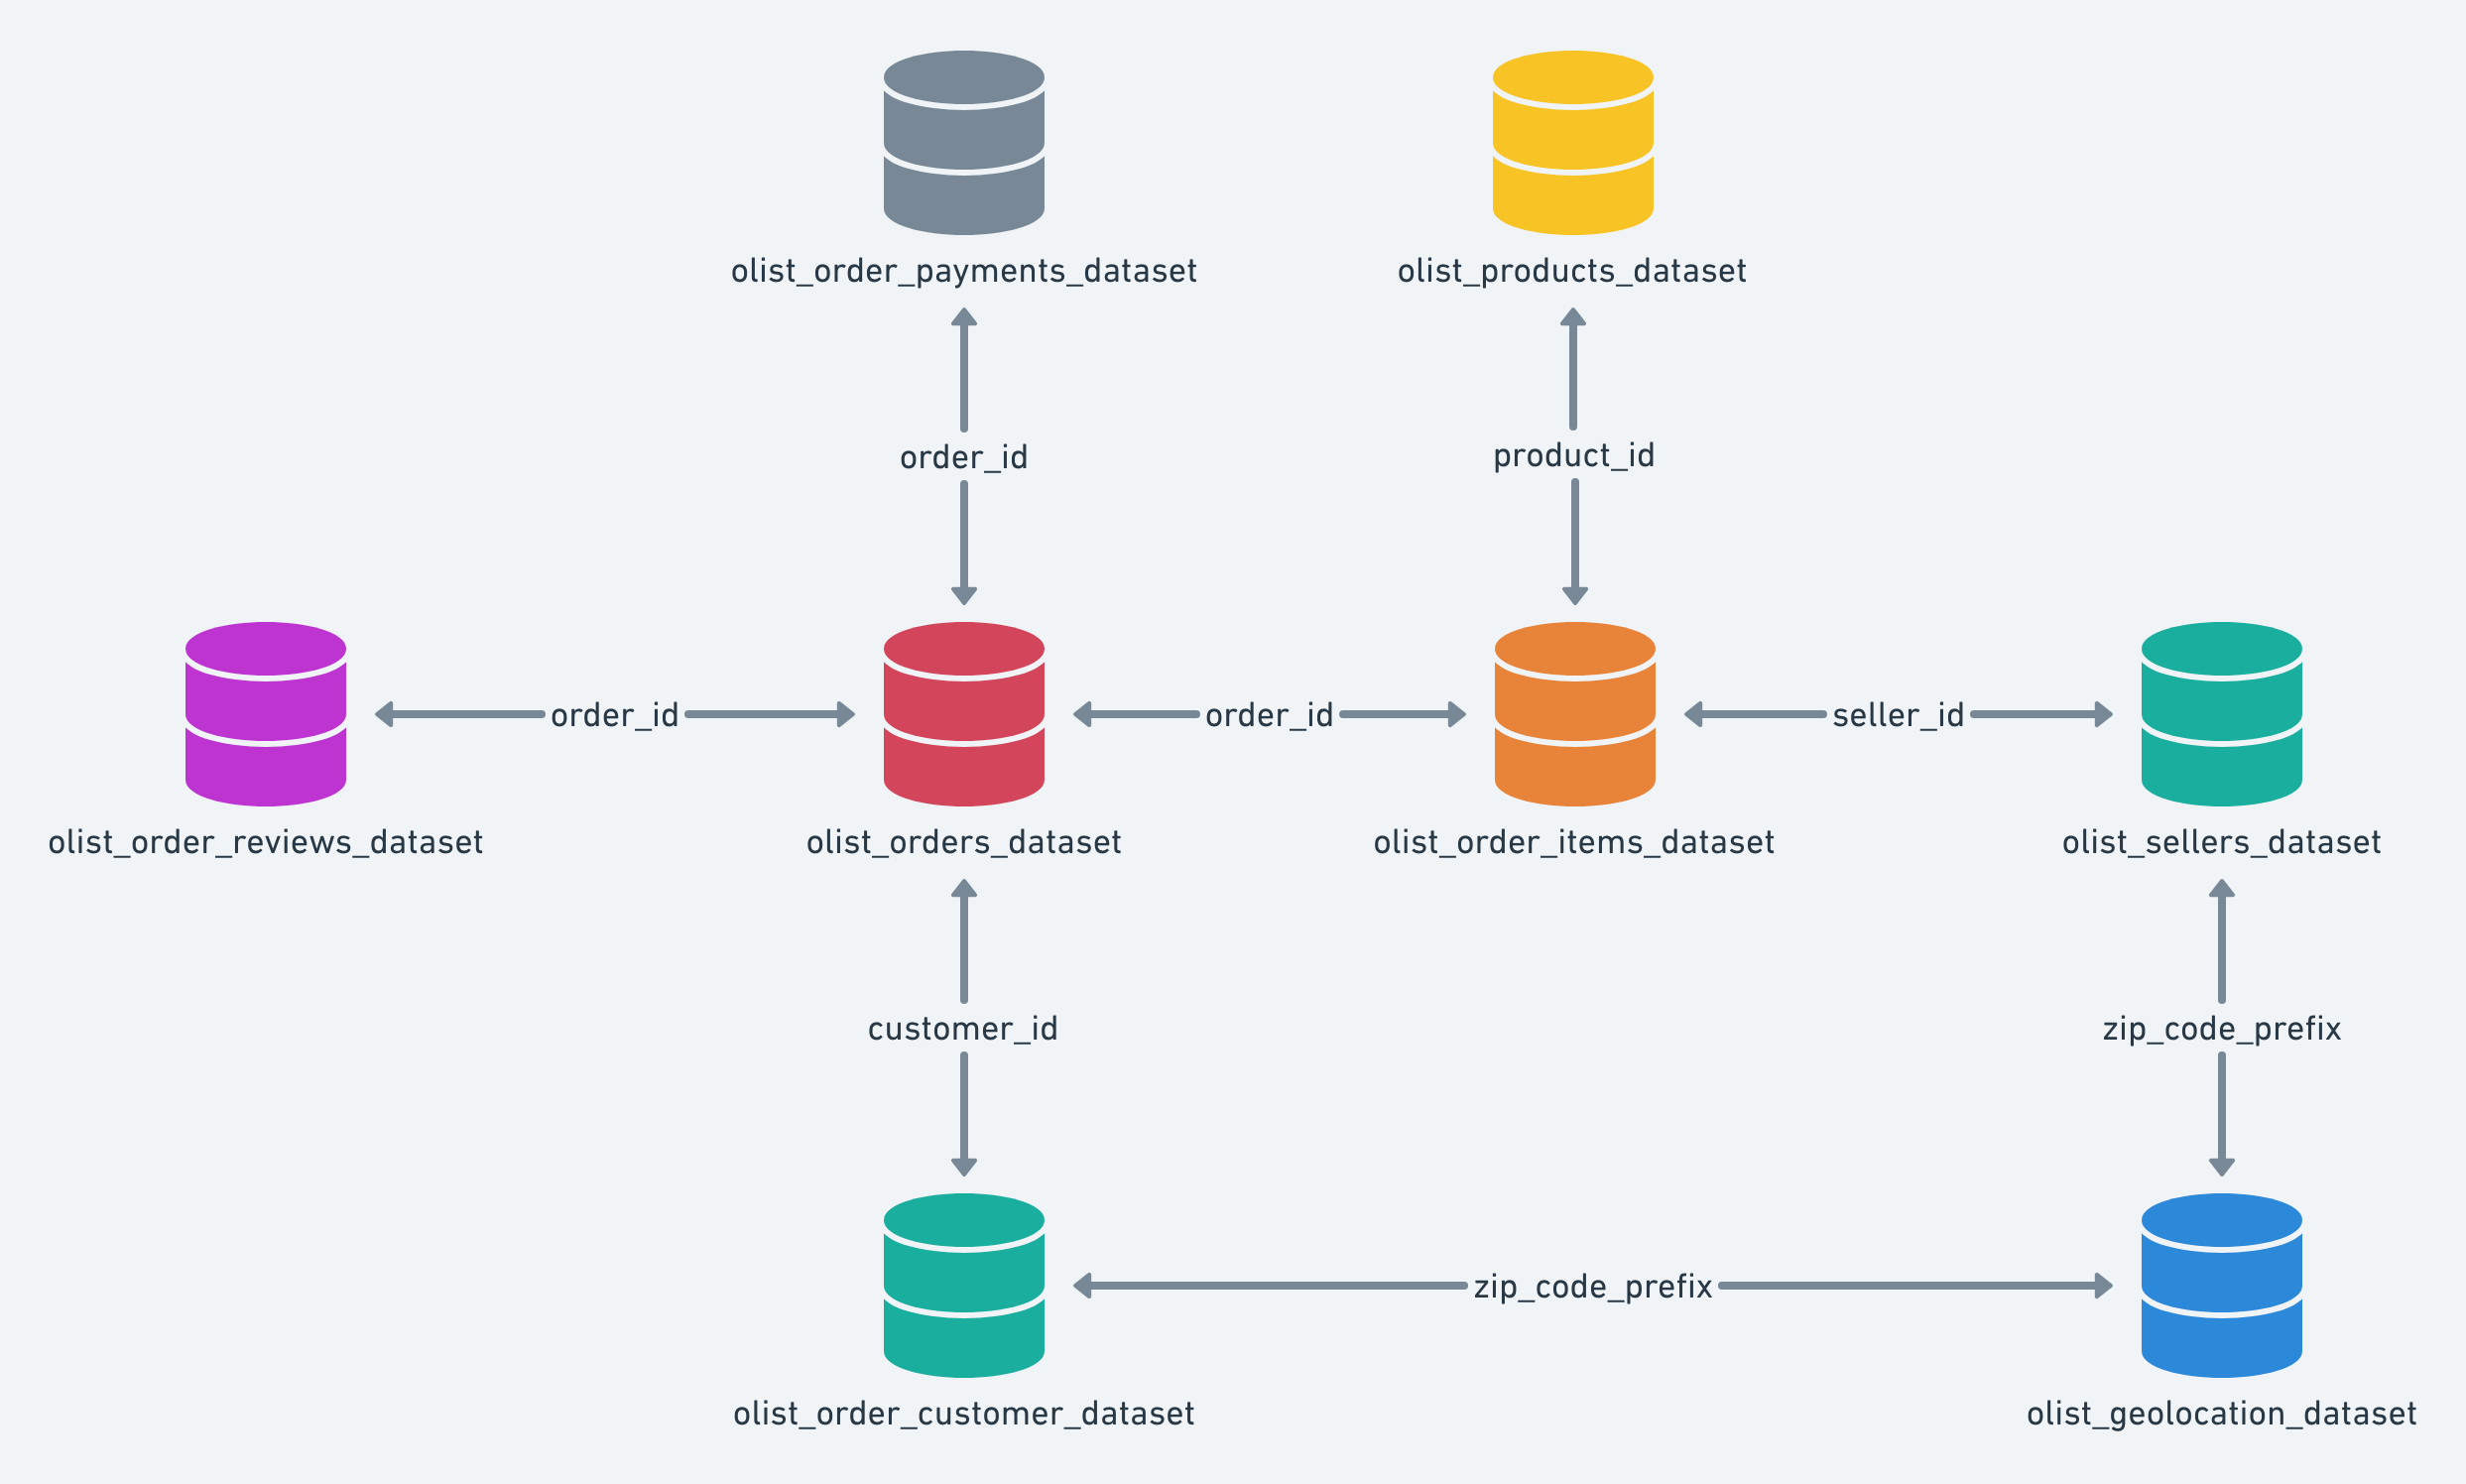

Nous allons donc partir du dataset de base, soit celui nommé *order*, puis lui ajouter les différents dataset à l'aide des différentes clés.

Pour le premier, nous réalisons une jointure à droite afin de conserver les éventuelles données des clients qui ne sont pas associés à une commande.

In [76]:
data = pd.DataFrame()
data = order.merge(cust, on='customer_id', how='right')
data = data.merge(item, on='order_id', how='outer')
data = data.merge(pay, on='order_id', how='outer')
data = data.merge(rev, on='order_id', how='outer')
data = data.merge(prod, on='product_id', how='outer')
data = data.merge(sell, on='seller_id', how='outer')
data = data.merge(cat, on='product_category_name', how='outer')

In [77]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,office_furniture
1,c1d2b34febe9cd269e378117d6681172,8912fc0c3bbf1e2fbf35819e21706718,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1.0,credit_card,1.0,275.79,7fc63200f12eebb5f387856afdd63db8,1.0,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,office_furniture
2,c1d2b34febe9cd269e378117d6681172,8912fc0c3bbf1e2fbf35819e21706718,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,2.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1.0,credit_card,1.0,275.79,7fc63200f12eebb5f387856afdd63db8,1.0,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,office_furniture
3,b1a5d5365d330d10485e0203d54ab9e8,f0ac8e5a239118859b1734e1087cbb1f,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,1.0,credit_card,7.0,140.61,251191809e37c1cffc16865947c18a4d,3.0,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,office_furniture
4,2e604b3614664aa66867856dba7e61b7,6bc8d08963a135220ed6c6d098831f84,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,1.0,credit_card,10.0,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4.0,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,office_furniture


In [78]:
data.shape

(119143, 40)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   customer_unique_id             119143 non-null  object 
 9   customer_zip_code_prefix       119143 non-null  int64  
 10  customer_city                  119143 non-null  object 
 11  customer_state                 119143 non-null  object 
 12  order_item_id                 

In [80]:
data.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,119143.000000,118310.000000,118310.000000,118310.000000,119140.000000,119140.000000,119140.000000,118146.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000
mean,35033.451298,1.196543,120.646603,20.032387,1.094737,2.941246,172.735135,4.015582,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413
std,29823.198969,0.699489,184.109691,15.836850,0.730141,2.777848,267.776077,1.400436,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511
min,1003.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,11250.000000,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000
50%,24240.000000,1.000000,74.900000,16.280000,1.000000,2.000000,108.160000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000
75%,58475.000000,1.000000,134.900000,21.180000,1.000000,4.000000,189.240000,5.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000
max,99990.000000,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000


## <a id="13"></a>  2.2 Nettoyage

Vérifions dans un premier temps si nos données ne sont pas dupliquées. 

In [81]:
display(data[data.duplicated(keep=False)].head(10))
print("Nombre de commandes dupliquées : ", data[data.duplicated()].shape[0])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english


Nombre de commandes dupliquées :  0


In [82]:
data.loc[data['order_status'] != 'delivered'].shape

(3420, 40)

Nous décidons de ne garder que les commandes notées comme *delivered* et non pas celles qui sont encore 'en cours'.

In [42]:
data = data.loc[data['order_status'] == 'delivered']

Nous allons à présent compléter les valeurs manquantes des variables qui pourraient nous être utiles par la suite.

In [43]:
fc.missing_general(data)

Nombre total de cellules manquantes : 181541
Nombre de cellules manquantes en % : 3.92%


In [44]:
fc.valeurs_manquantes(data)

,Variable,Missing values,Missing (%)
0,order_id,0,0.000000
1,customer_id,0,0.000000
2,order_status,0,0.000000
3,order_purchase_timestamp,0,0.000000
4,order_approved_at,15,0.000130
5,order_delivered_carrier_date,2,0.000017
6,order_delivered_customer_date,8,0.000069
7,order_estimated_delivery_date,0,0.000000
8,customer_unique_id,0,0.000000
9,customer_zip_code_prefix,0,0.000000


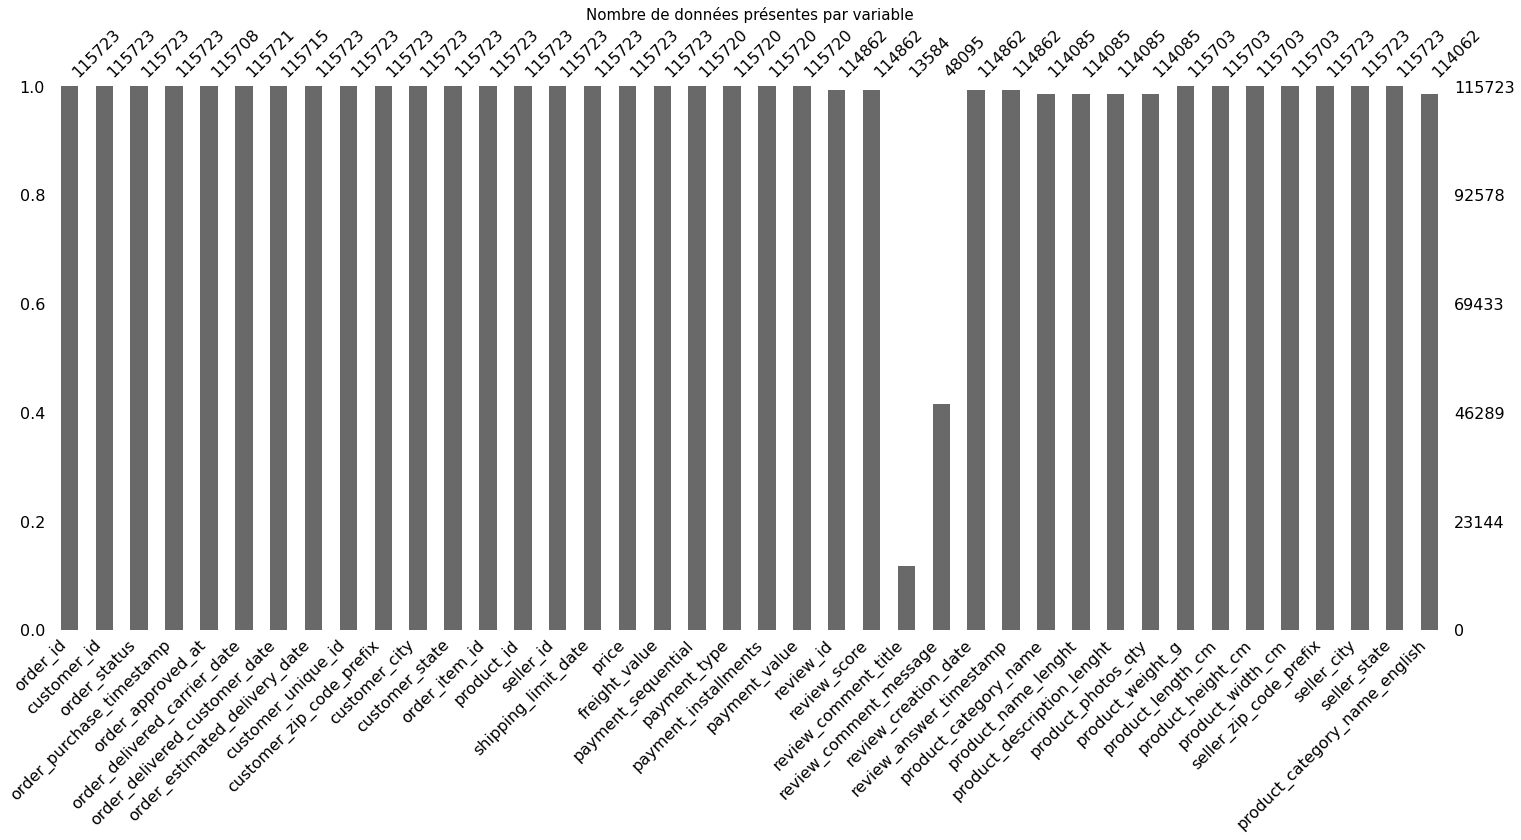

In [45]:
fc.bar_missing(data)

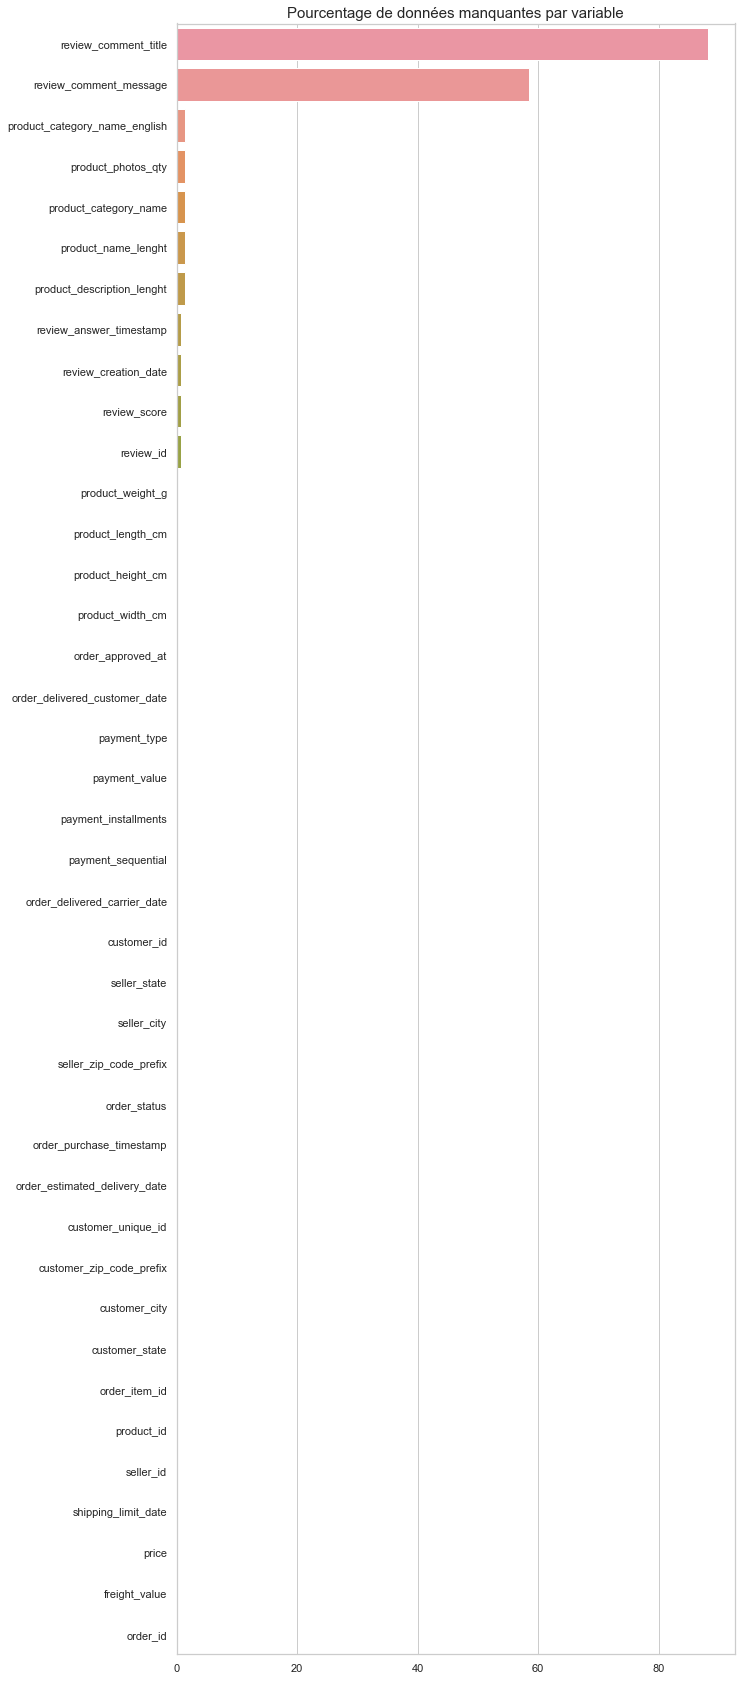

In [46]:
fc.barplot_missing(data)

Nous supprimons les 3 observations qui n'ont pas de données renseignées pour le paiement.

In [47]:
index_pay = data.loc[data['payment_value'].isna()].index

In [48]:
fc.drop_lignes(data, index_pay)

Suppression effectuée


Nous allons désormais imputer les valeurs manquantes des variables qui nous intéressent pour la suite de l'étude.

In [49]:
# On remplace la date de livraison non renseignée par la date de livraison
# estimée car toutes nos observations sont classées comme 'delivered'.
data['order_delivered_customer_date']\
    .fillna(value=data['order_estimated_delivery_date'], inplace=True)

# On remplace les valeurs manquantes de la colonne 'review_score'
# par la moyenne
data['review_score'].fillna(data['review_score'].mean(), inplace=True)
data['review_comment_title'].fillna('None', inplace=True)
data['review_comment_message'].fillna('None', inplace=True)

# On remplace par 0 les valeurs manquantes liées au produit
data['product_name_lenght'].fillna(0, inplace=True)
data['product_description_lenght'].fillna(0, inplace=True)
data['product_photos_qty'].fillna(0, inplace=True)
data['product_weight_g'].fillna(0, inplace=True)
data['product_length_cm'].fillna(0, inplace=True)
data['product_height_cm'].fillna(0, inplace=True)
data['product_width_cm'].fillna(0, inplace=True)

Nous allons désormais remplir les valeurs manquantes de la variable *product_category_name_english*. 

In [50]:
data['product_category_name_english'].nunique()

71

In [51]:
data['product_category_name'].nunique()

73

In [52]:
data['product_category_name_english']\
    .fillna(value=data['product_category_name'], inplace=True)

In [53]:
data['product_category_name_english'][~data['product_category_name_english']
                                      .isin(
                                          cat['product_category_name_english']
                                      )].value_counts()

portateis_cozinha_e_preparadores_de_alimentos    14
pc_gamer                                          9
Name: product_category_name_english, dtype: int64

Nous allons désormais traduire la catégorie restante, puisque *'pc_gamer'* est déjà traduit en anglais.

In [54]:
data['product_category_name_english'] =\
    data['product_category_name_english'].str\
    .replace('portateis_cozinha_e_preparadores_de_alimentos',
             'kitchen_portables_and_food_preparators')

data['product_category_name_english'].fillna(value='uncategorized',
                                             inplace=True)

In [55]:
fc.valeurs_manquantes(data)

,Variable,Missing values,Missing (%)
0,order_id,0,0.000000
1,customer_id,0,0.000000
2,order_status,0,0.000000
3,order_purchase_timestamp,0,0.000000
4,order_approved_at,15,0.000130
5,order_delivered_carrier_date,2,0.000017
6,order_delivered_customer_date,0,0.000000
7,order_estimated_delivery_date,0,0.000000
8,customer_unique_id,0,0.000000
9,customer_zip_code_prefix,0,0.000000


Nous allons désormais nettoyer les types des données.

In [56]:
data.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
review_id                         object
review_score                     float64
review_comment_t

In [90]:
col_date = ['order_purchase_timestamp', 'order_approved_at',
            'order_delivered_carrier_date', 'order_delivered_customer_date',
            'order_estimated_delivery_date', 'shipping_limit_date']

data[col_date] = data[col_date].apply(pd.to_datetime,
                                      format='%Y-%m-%d %H:%M:%S.%f')

In [91]:
col_cat = ['order_status', 'customer_zip_code_prefix', 'customer_city',
           'customer_state', 'payment_type', 'seller_zip_code_prefix',
           'seller_city', 'seller_state', 'product_category_name_english']

data[col_cat] = data[col_cat].astype('category')

In [92]:
data.dtypes

order_id                                 object
customer_id                              object
order_status                           category
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix               category
customer_city                          category
customer_state                         category
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                           category
payment_installments                    

In [60]:
data.shape

(115720, 40)

In [61]:
data.to_csv('data_cleaned_all.csv', index=False)

In [84]:
data = pd.read_csv('data_cleaned_all.csv')

## <a id="14"></a>  2.3 Construction du data set client aggrégé

In [94]:
date_max = data['order_purchase_timestamp'].max()
date_min = data['order_purchase_timestamp'].min()

print('Le data set va de {} à {}, soit {} jours.'
      .format(date_min,
              date_max,
              (date_max-date_min).days))

Le data set va de 2016-10-03 09:44:50 à 2018-08-29 15:00:37, soit 695 jours.


In [98]:
data_cust = fc.df_agg_cust(data)

In [99]:
data_cust.head()

,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,time_since_first_order,time_since_last_order,mean_shipping_time,mean_delivery_delay,customer_city,customer_state,nb_total_order,nb_total_item,total_price,mean_price,total_freight_value,mean_freight_value,payment_type,mean_payment_installments,total_payment_value,mean_payment_value,mean_review_score,seller_city,seller_state,cat
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-16 20:48:37,2018-05-21,111,111,6,-5,cajamar,SP,1,1,129.90,129.90,12.00,12.00,credit_card,8.0,141.90,141.90,5.0,piracicaba,SP,bed_bath_table
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-10 18:02:42,2018-05-15,114,114,3,-5,osasco,SP,1,1,18.90,18.90,8.29,8.29,credit_card,1.0,27.19,27.19,4.0,sao paulo,SP,health_beauty
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-04-05 14:38:47,2017-04-07,536,536,25,-2,sao jose,SC,1,1,69.00,69.00,17.22,17.22,credit_card,8.0,86.22,86.22,3.0,campo limpo paulista,SP,stationery
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-11-01 21:23:05,2017-11-13,320,320,20,-12,belem,PA,1,1,25.99,25.99,17.63,17.63,credit_card,4.0,43.62,43.62,4.0,sao paulo,SP,telephony
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-27 23:08:56,2017-12-05,287,287,13,-8,sorocaba,SP,1,1,180.00,180.00,16.89,16.89,credit_card,6.0,196.89,196.89,5.0,jacarei,SP,telephony


In [66]:
data_cust.to_csv('data_customers.csv')

# <a id="15"></a> 3. Exploration des données

In [69]:
data_cust.shape

(93357, 23)

In [73]:
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93357 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_purchase_timestamp       93357 non-null  datetime64[ns]
 1   order_delivered_customer_date  93357 non-null  datetime64[ns]
 2   order_estimated_delivery_date  93357 non-null  datetime64[ns]
 3   time_since_first_order         93357 non-null  int64         
 4   time_since_last_order          93357 non-null  int64         
 5   mean_shipping_time             93357 non-null  int64         
 6   mean_delivery_delay            93357 non-null  int64         
 7   customer_city                  93357 non-null  object        
 8   customer_state                 93357 non-null  object        
 9   nb_total_order                 93357 non-null  int64         
 10  nb_total_item                

In [67]:
data_cust.describe()

,time_since_first_order,time_since_last_order,mean_shipping_time,mean_delivery_delay,nb_total_order,nb_total_item,total_price,mean_price,total_freight_value,mean_freight_value,mean_payment_installments,total_payment_value,mean_payment_value,mean_review_score
count,93357.000000,93357.000000,93357.000000,93357.000000,93357.000000,93357.000000,93357.000000,93357.000000,93357.000000,93357.000000,93357.000000,93357.000000,93357.000000,93357.000000
mean,239.581852,236.936673,12.101267,-11.843740,1.239543,1.239543,148.637347,125.835110,24.768352,20.184550,2.900294,212.966838,157.787462,4.152996
std,153.092611,152.584315,9.552364,10.139368,0.849057,0.849057,245.405174,190.541768,27.340739,15.708532,2.677079,646.226951,217.029531,1.276137
min,0.000000,0.000000,0.000000,-147.000000,1.000000,1.000000,0.850000,0.850000,0.000000,0.000000,0.000000,9.590000,1.856818,1.000000
25%,116.000000,113.000000,6.000000,-17.000000,1.000000,1.000000,48.900000,42.900000,14.100000,13.370000,1.000000,63.830000,60.730000,4.000000
50%,221.000000,218.000000,10.000000,-12.000000,1.000000,1.000000,89.900000,79.000000,17.700000,16.390000,2.000000,113.140000,103.590000,5.000000
75%,349.000000,345.000000,15.000000,-7.000000,1.000000,1.000000,159.900000,139.900000,26.610000,21.190000,4.000000,202.640000,174.730000,5.000000
max,695.000000,694.000000,209.000000,188.000000,75.000000,75.000000,13440.000000,6735.000000,1794.960000,409.680000,24.000000,109312.640000,13664.080000,5.000000


In [112]:
col_quanti = data_cust.select_dtypes(['int64', 'float64']).columns
col_quali = data_cust.select_dtypes(['category', 'object', 'bool']).columns
col_date = data_cust.select_dtypes(['datetime64[ns]']).columns

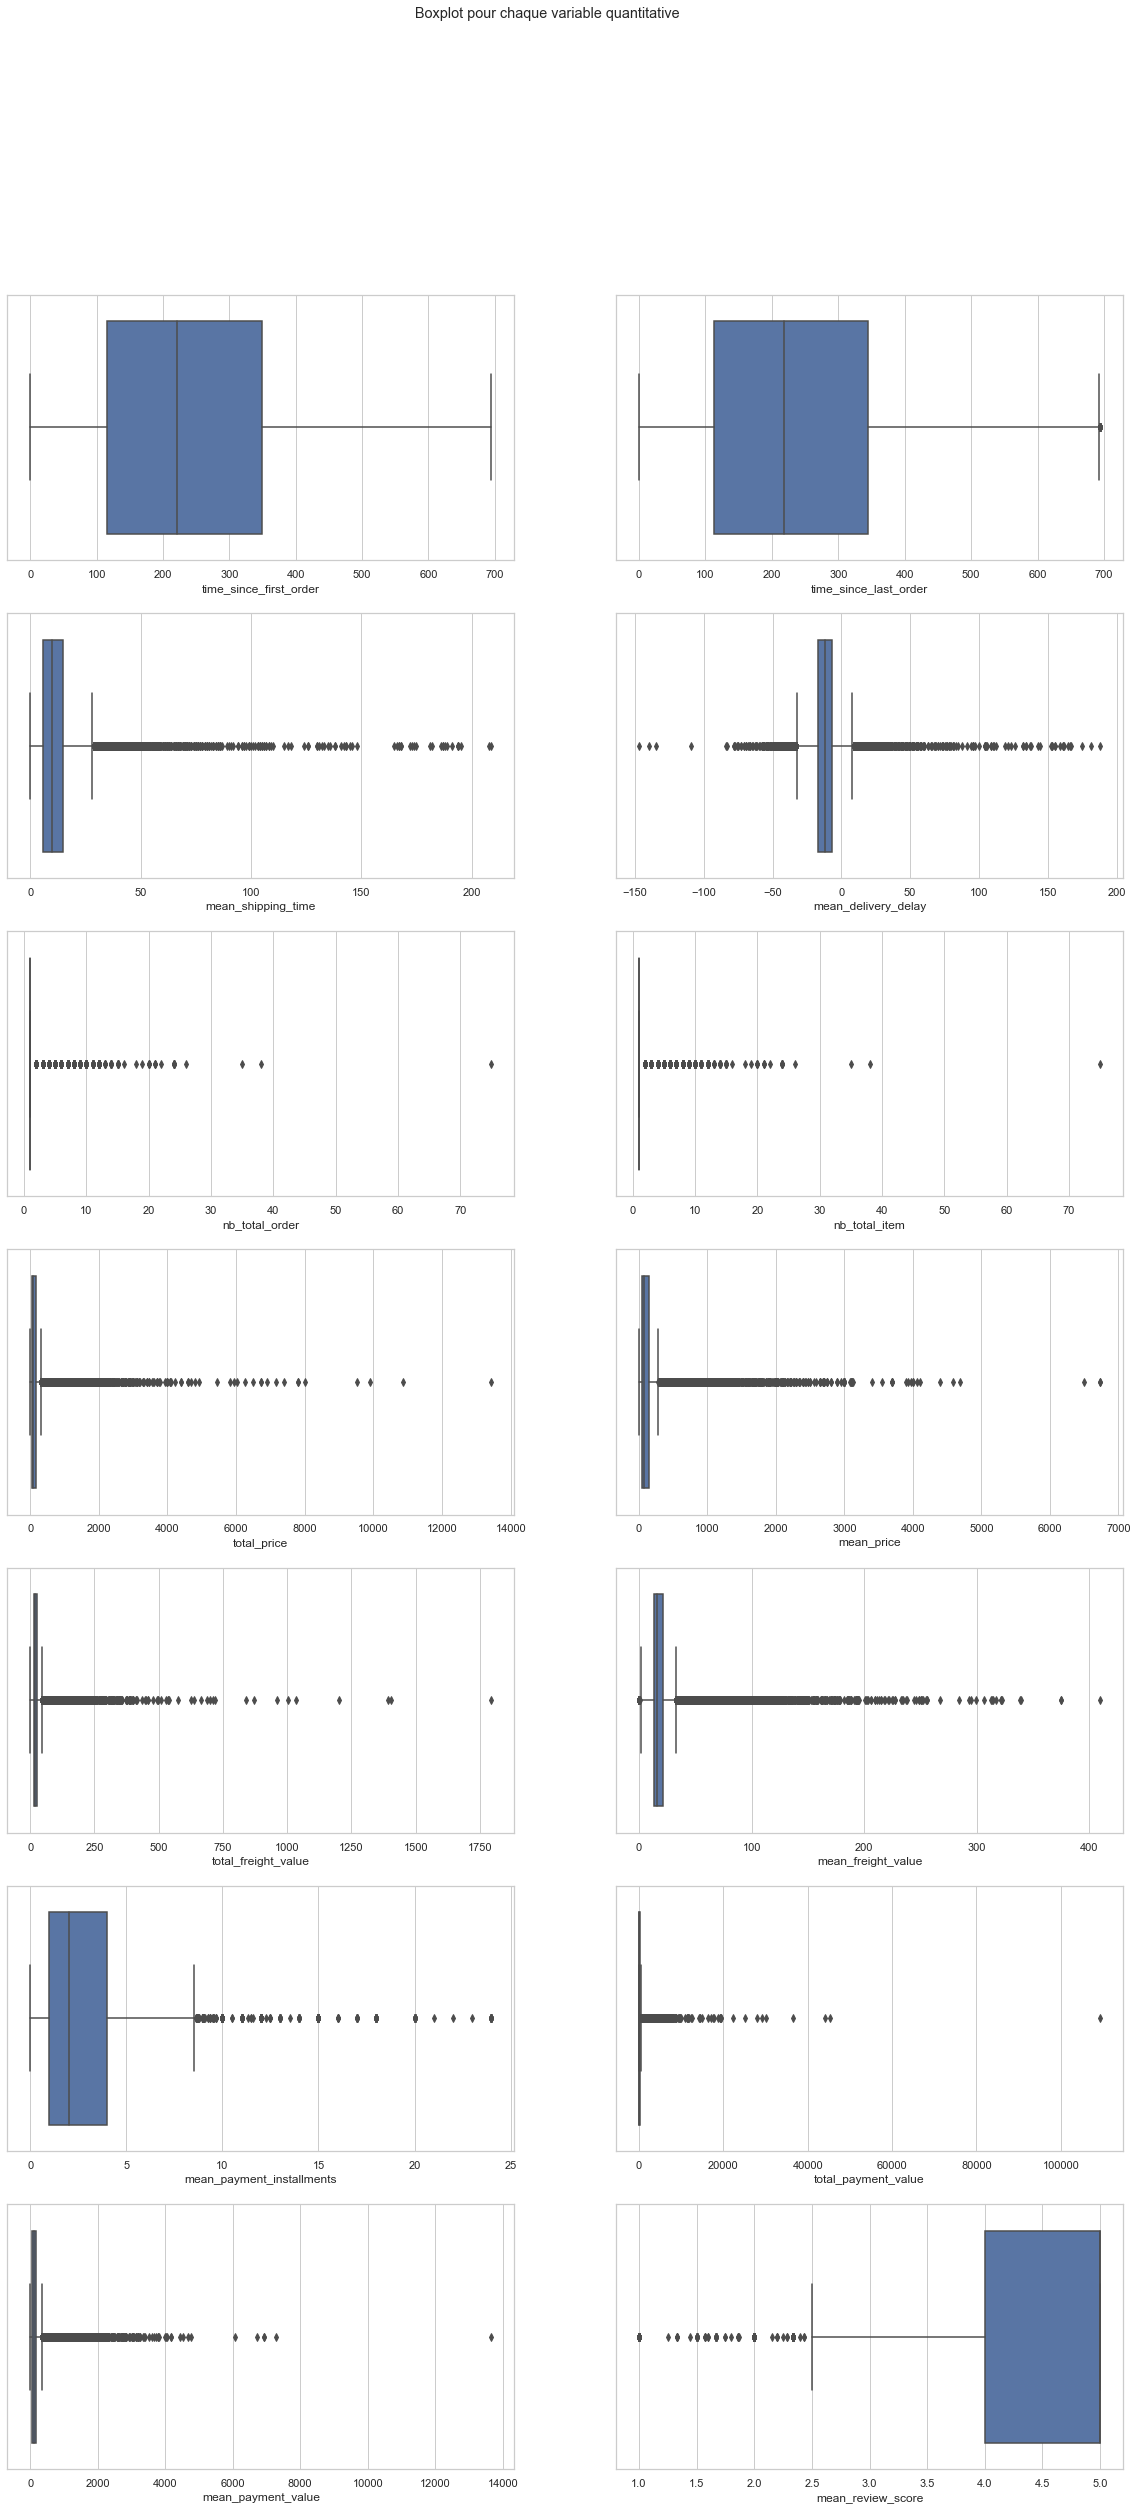

In [101]:
fc.multi_boxplot(data_cust[col_quanti], 7, 2)

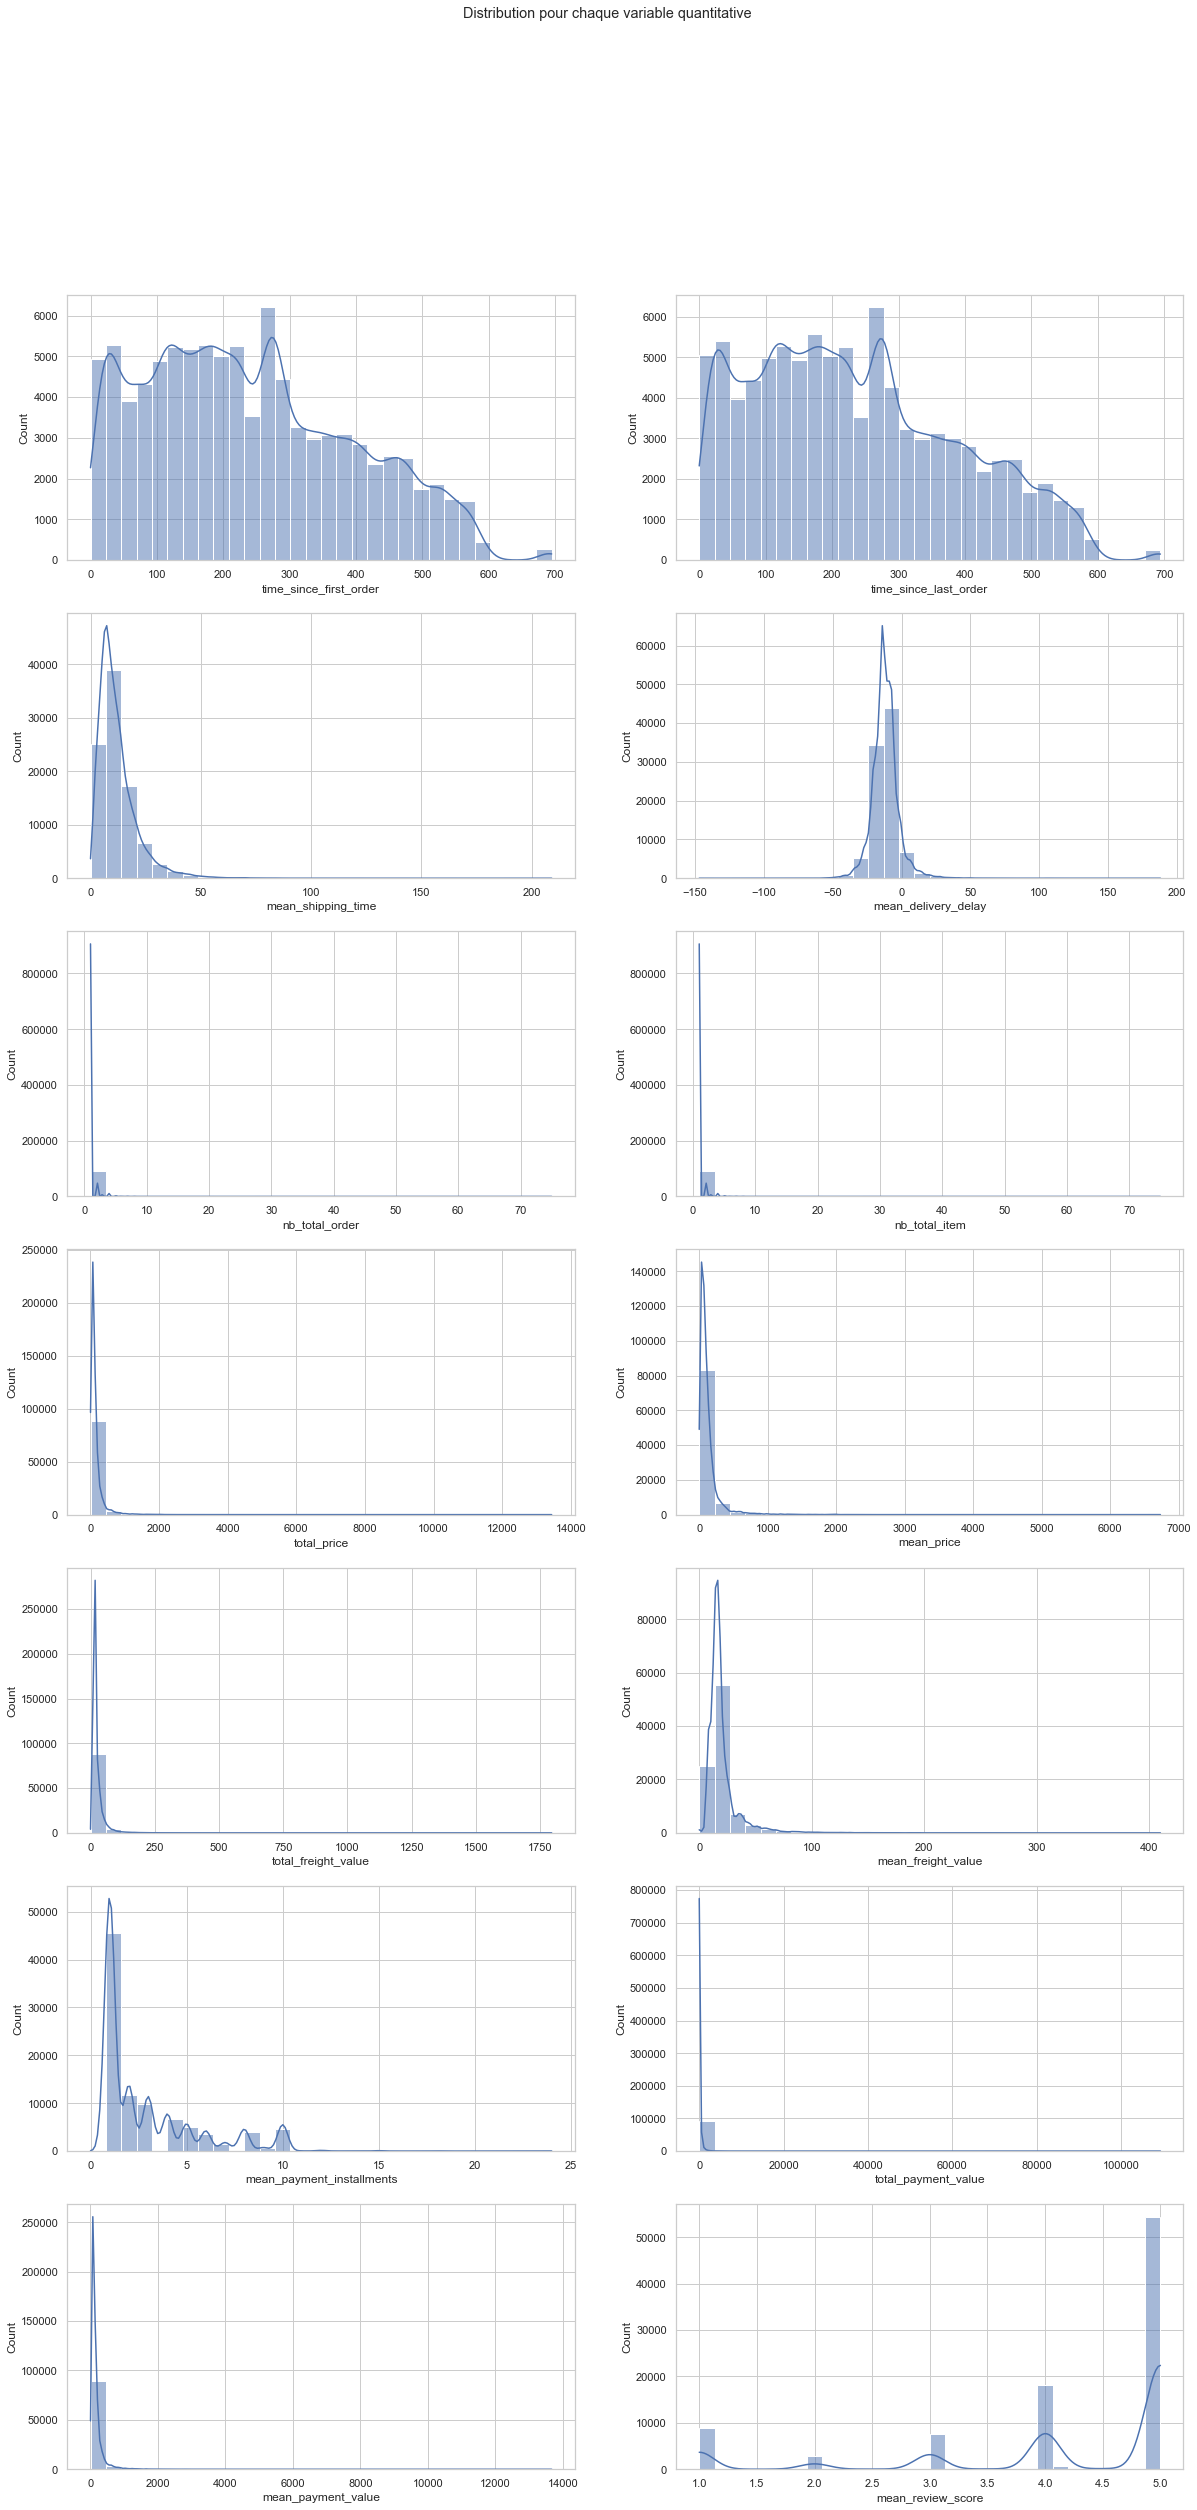

In [103]:
fc.distribution(data_cust, col_quanti, 7, 2)

La plupart des variables sont concentrées autour de certaines valeurs.

In [88]:
fc.test_normalite(data_cust, col_quanti, 0.05)

Tests de normalité pour la variable time_since_first_order.
                           Stat p-value Resultat
Shapiro Wilk           0.962452     0.0       H1
Anderson-Darling     858.187462     NaN       H1
K2 de D'Agostino    7230.109745     0.0       H1
Kolmogorov-Smirnov     0.997633     0.0       H1
----------------------------------------------------------------------
Tests de normalité pour la variable time_since_last_order.
                           Stat p-value Resultat
Shapiro Wilk           0.961422     0.0       H1
Anderson-Darling      885.17204     NaN       H1
K2 de D'Agostino    6944.078317     0.0       H1
Kolmogorov-Smirnov     0.997548     0.0       H1
----------------------------------------------------------------------
Tests de normalité pour la variable mean_shipping_time.
                            Stat p-value Resultat
Shapiro Wilk            0.759137     0.0       H1
Anderson-Darling     3994.993923     NaN       H1
K2 de D'Agostino    82156.113458     0.0   

/Users/oceaneyouyoutte/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/oceaneyouyoutte/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/oceaneyouyoutte/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/oceaneyouyoutte/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/oceaneyouyoutte/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
 

                             Stat p-value Resultat
Shapiro Wilk             0.287026     0.0       H1
Anderson-Darling     23152.304069     NaN       H1
K2 de D'Agostino    186148.392789     0.0       H1
Kolmogorov-Smirnov       0.841345     0.0       H1
----------------------------------------------------------------------
Tests de normalité pour la variable total_price.
                             Stat p-value Resultat
Shapiro Wilk             0.418126     0.0       H1
Anderson-Darling      12988.55014     NaN       H1
K2 de D'Agostino    159750.521675     0.0       H1
Kolmogorov-Smirnov       0.999855     0.0       H1
----------------------------------------------------------------------
Tests de normalité pour la variable mean_price.
                             Stat p-value Resultat
Shapiro Wilk             0.461344     0.0       H1
Anderson-Darling     12218.531721     NaN       H1
K2 de D'Agostino    128212.548779     0.0       H1
Kolmogorov-Smirnov       0.999812     0.0      

/Users/oceaneyouyoutte/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/oceaneyouyoutte/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/oceaneyouyoutte/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/oceaneyouyoutte/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/oceaneyouyoutte/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
 

                             Stat p-value Resultat
Shapiro Wilk             0.577599     0.0       H1
Anderson-Darling      9524.840226     NaN       H1
K2 de D'Agostino    104387.311119     0.0       H1
Kolmogorov-Smirnov       0.996196     0.0       H1
----------------------------------------------------------------------
Tests de normalité pour la variable mean_payment_installments.
                            Stat p-value Resultat
Shapiro Wilk            0.738175     0.0       H1
Anderson-Darling     9100.511205     NaN       H1
K2 de D'Agostino    26573.280007     0.0       H1
Kolmogorov-Smirnov      0.841323     0.0       H1
----------------------------------------------------------------------
Tests de normalité pour la variable total_payment_value.
                             Stat p-value Resultat
Shapiro Wilk              0.15955     0.0       H1
Anderson-Darling     20472.452952     NaN       H1
K2 de D'Agostino    329530.269885     0.0       H1
Kolmogorov-Smirnov           

/Users/oceaneyouyoutte/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/oceaneyouyoutte/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/oceaneyouyoutte/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Les tests indiquent que les distributions des variables ne sont pas normales.

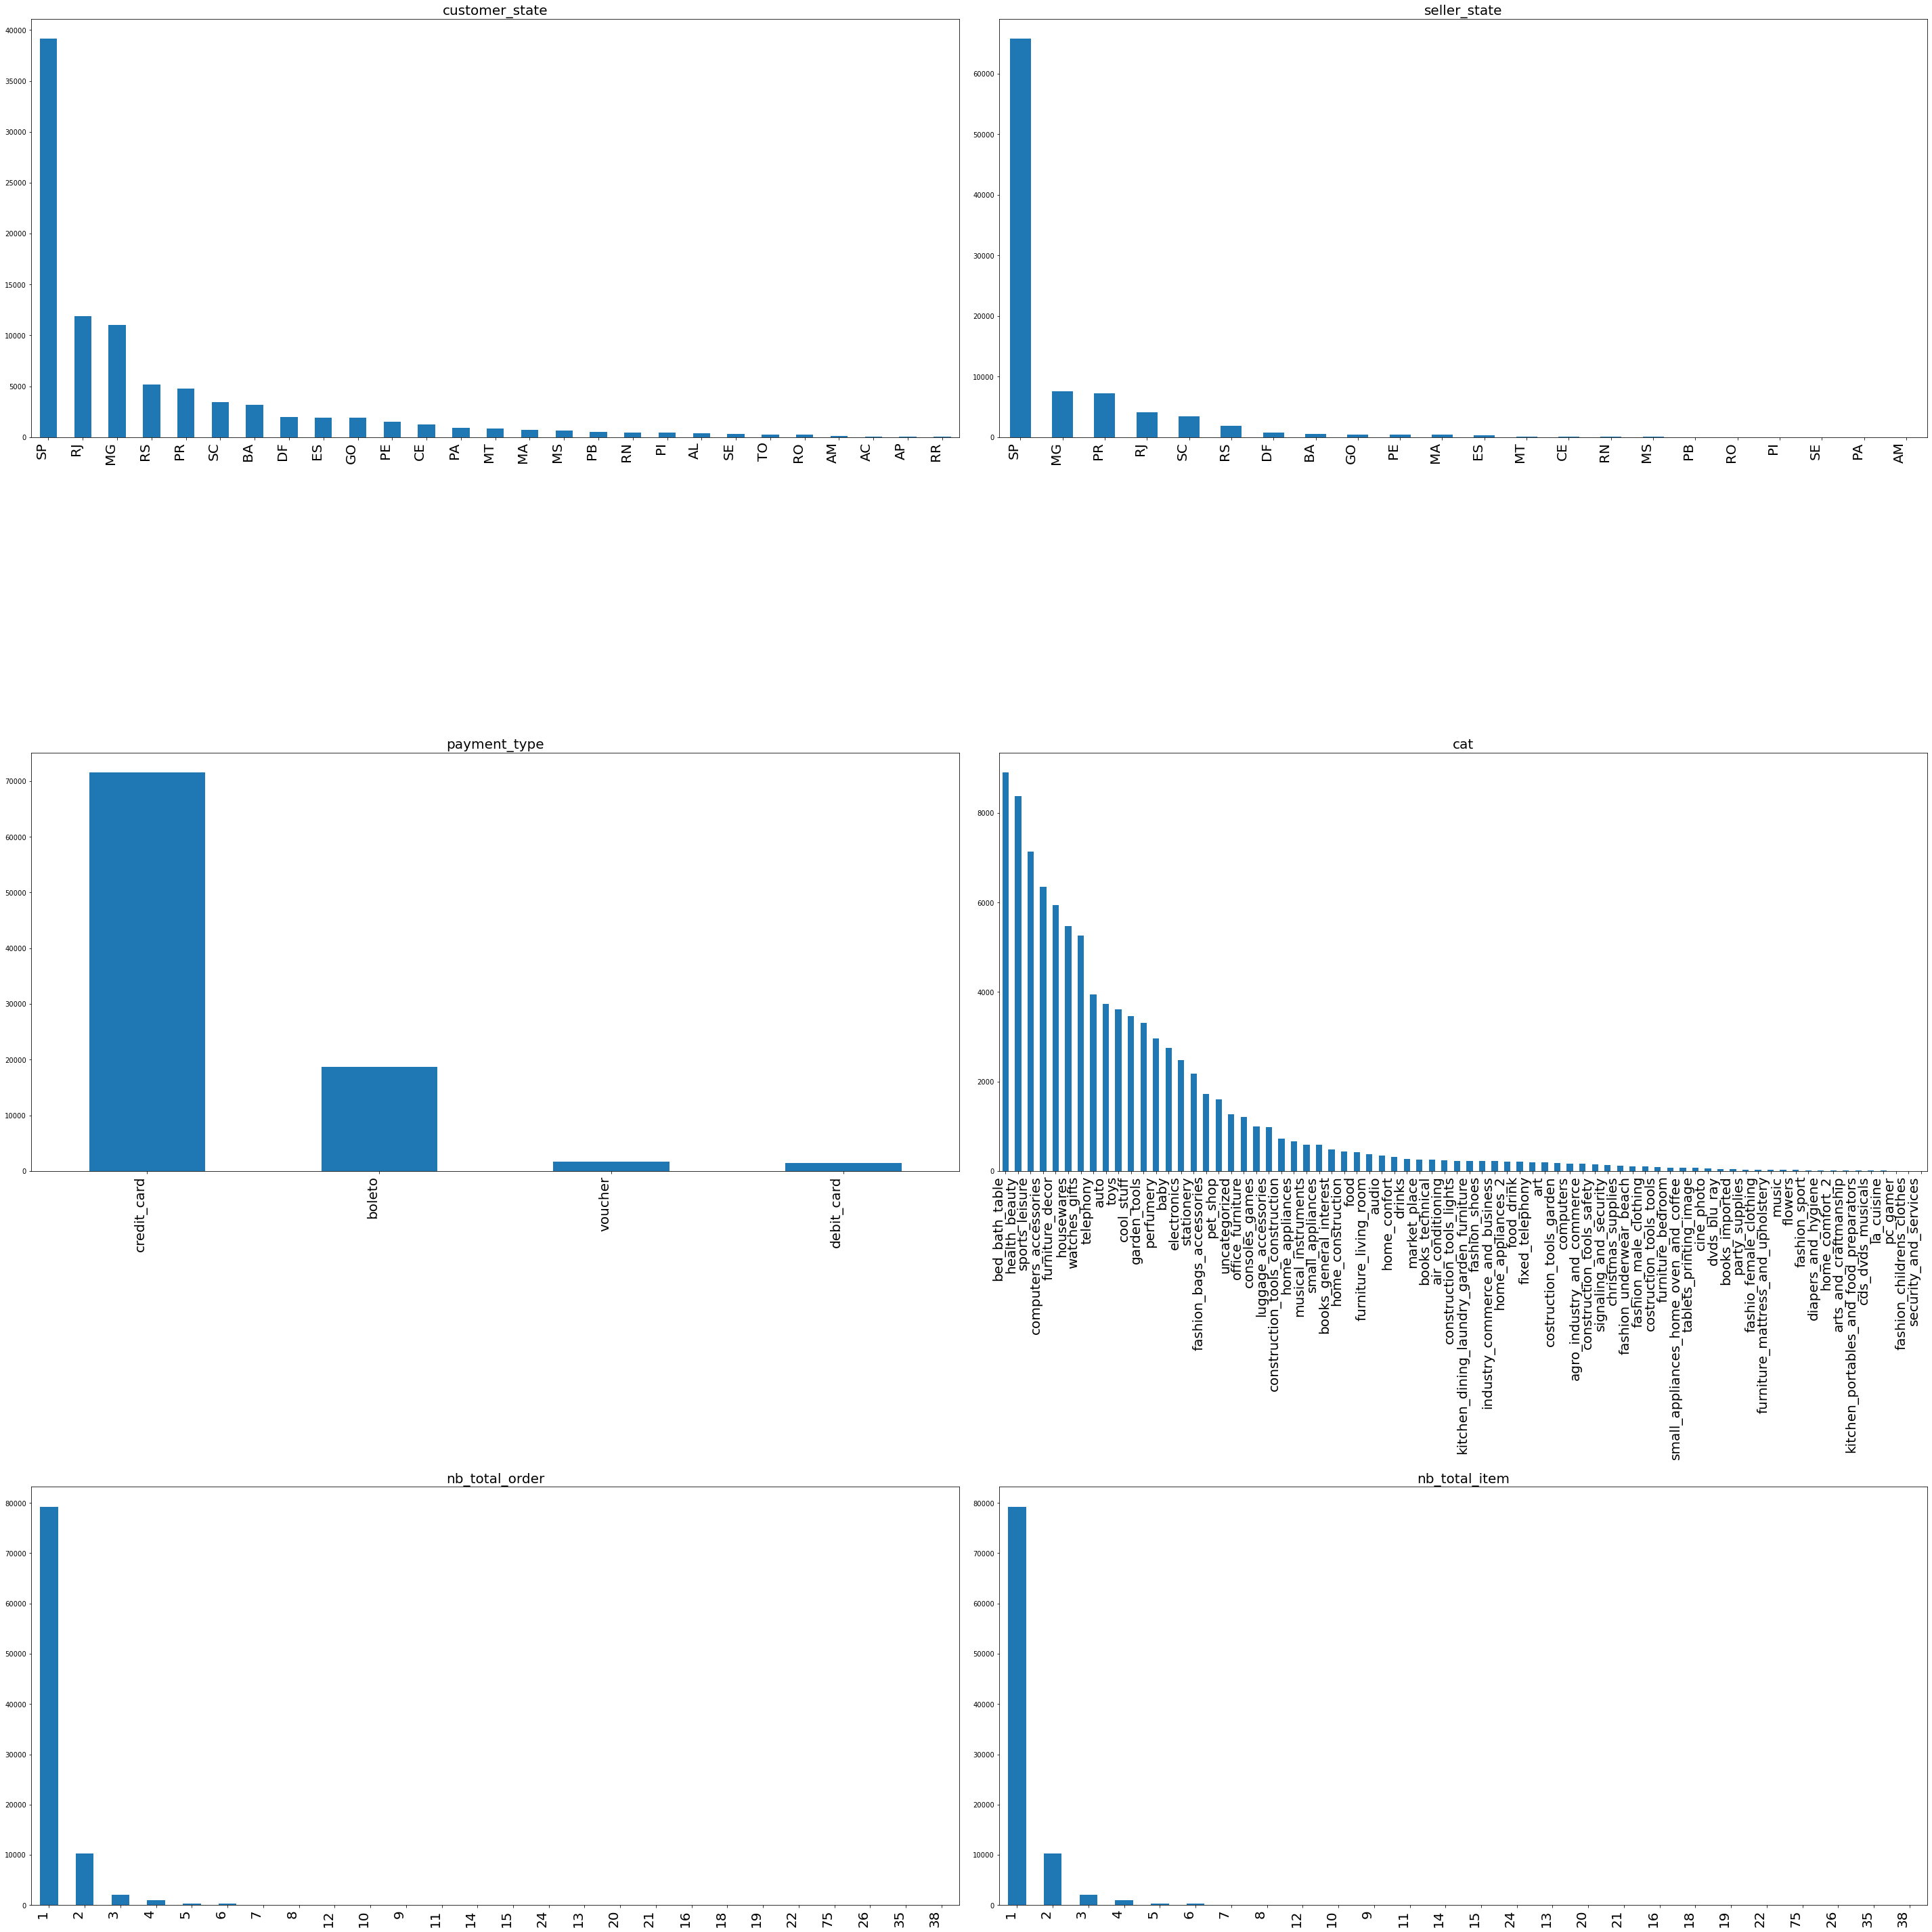

In [108]:
fc.bar_plot(data_cust,
            ['customer_state', 'seller_state', 'payment_type',
             'cat', 'nb_total_order', 'nb_total_item'], 3, 2)

On constate que l'État où les clients et vendeurs se trouvent principalement est *SP*. Pour les clients, il y a ensuite *RJ* et *MG*, et pour les vendeurs il y a *MG* et *PR*.

Le moyen de paiement le plus utilisé est la carte de crédit, puis en second lieu il y a les espèces. 

Les principales catégories de produits achetées sont : *bed_bath_table*, *health_beauty*, *sports_leisure*, *computer_accessories*, *furnitur_decor*, *housewares* et *watches_gifts* qui se situent tous au dessus de 5000 clients ayant acheté principalement de cette catégorie. 

Le nombre total de commande et d'article acheté est majoritairement de 1. Cela signifie que la plupart des clients n'ont passé qu'une seule commande d'un seul article.

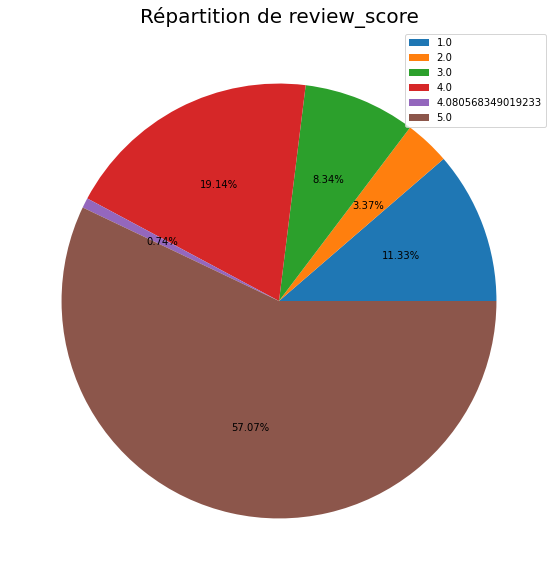

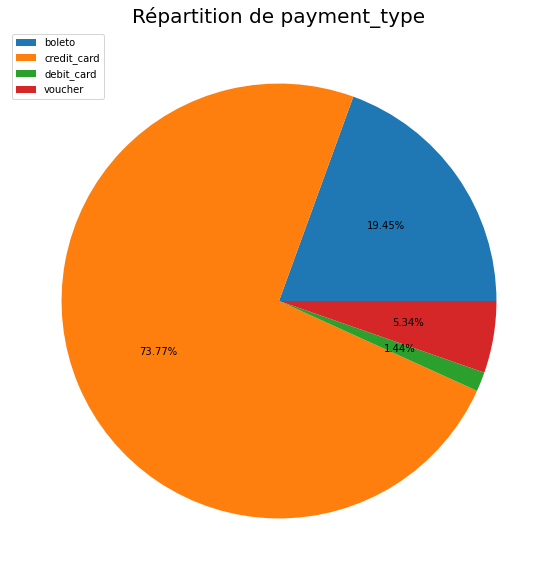

In [109]:
fc.pie_plot(data, ['review_score', 'payment_type'])

Les scores attribués par les clients sont en majorité une note de 5 (57.07%), viennent ensuite 4, 1, 3 et 2.

Pour les types de paiements, c'est la carte de crédit qui est le plus utilisée (73.77%).

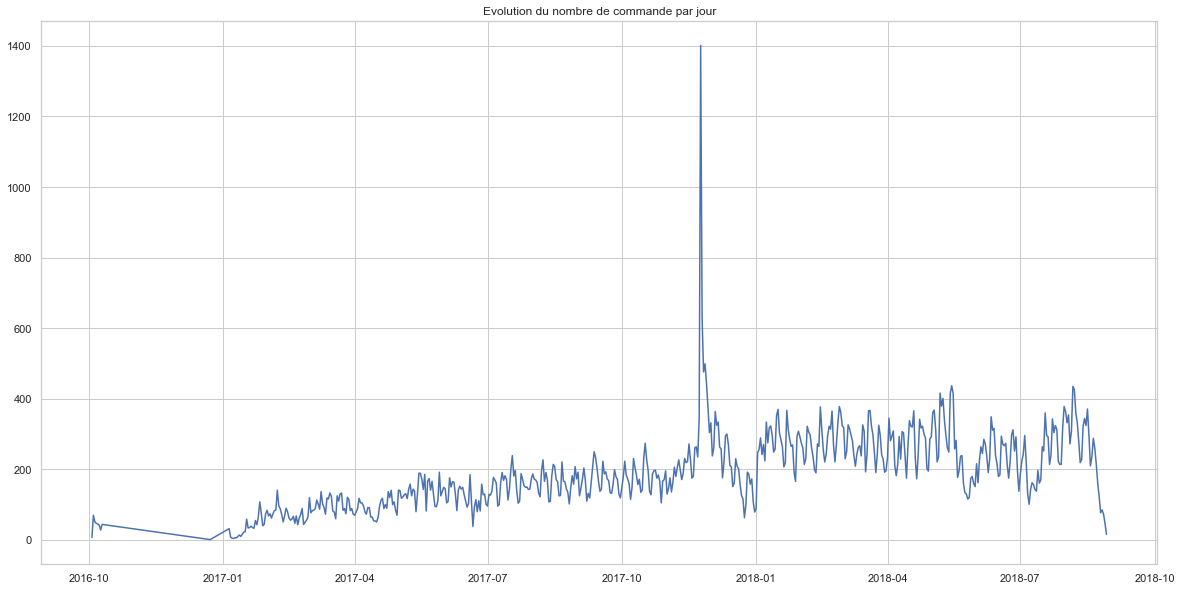

In [122]:
order_day = data.groupby(data['order_purchase_timestamp'].dt.date)\
    .agg({'order_id': 'count'})

plt.figure(figsize=(20, 10))
plt.plot(order_day)
plt.title('Evolution du nombre de commande par jour')
plt.show()

On constate que le nombre de commande semble plus important à partir de 2017. De plus, il y a un grand nombre de commande en fin d'année 2017 qui semble correspondre aux périodes de fêtes. 

Nous pouvons, de la même façon, observer la répartition du nombre de commandes en fonction des mois.

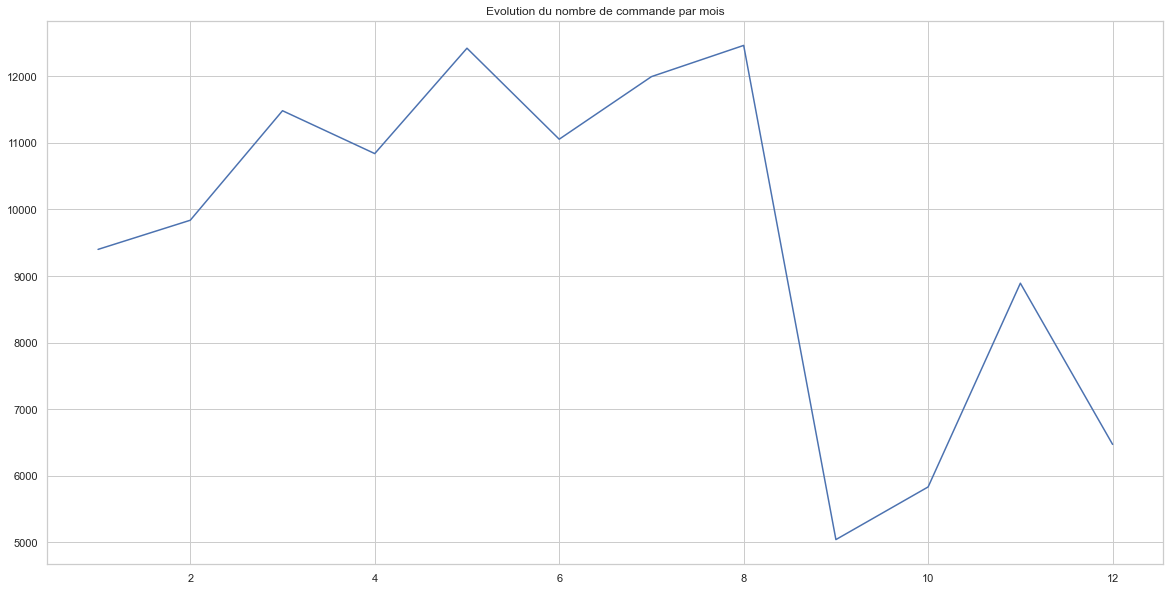

In [125]:
order_month = data.groupby(data['order_purchase_timestamp'].dt.month)\
    .agg({'order_id': 'count'})

plt.figure(figsize=(20, 10))
plt.plot(order_month)
plt.title('Evolution du nombre de commande par mois')
plt.show()

Ce graphique nous permet de constater que la plupart des commandes sont passées entre mars et aout. On observe également un pic en fin d'année avant la période des fêtes. En revanche, après l'été, vers la rentrée scolaire, peu de commandes sont passées.

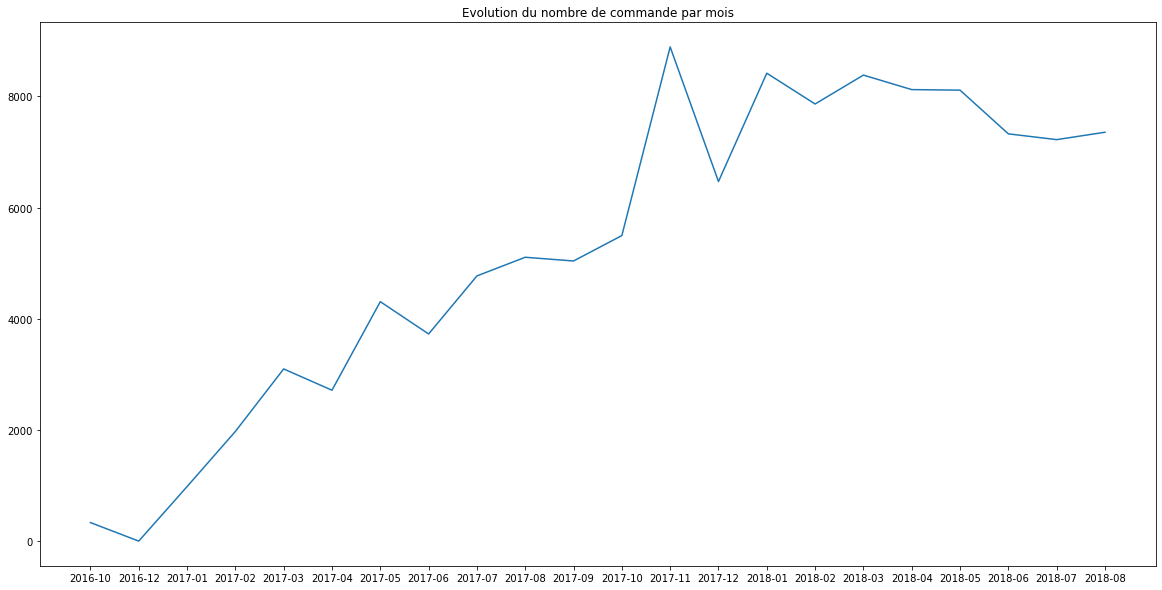

In [100]:
order_month = data.groupby(data['order_purchase_timestamp']
                           .dt.strftime('%Y-%m'))\
    .agg({'order_id': 'count'})

plt.figure(figsize=(20, 10))
plt.plot(order_month)
plt.title('Evolution du nombre de commande par mois')
plt.show()

On observe une tendance haussière au fur et à mesure des années. Un pic est atteint en fin d'année 2017, à la période des fêtes.  

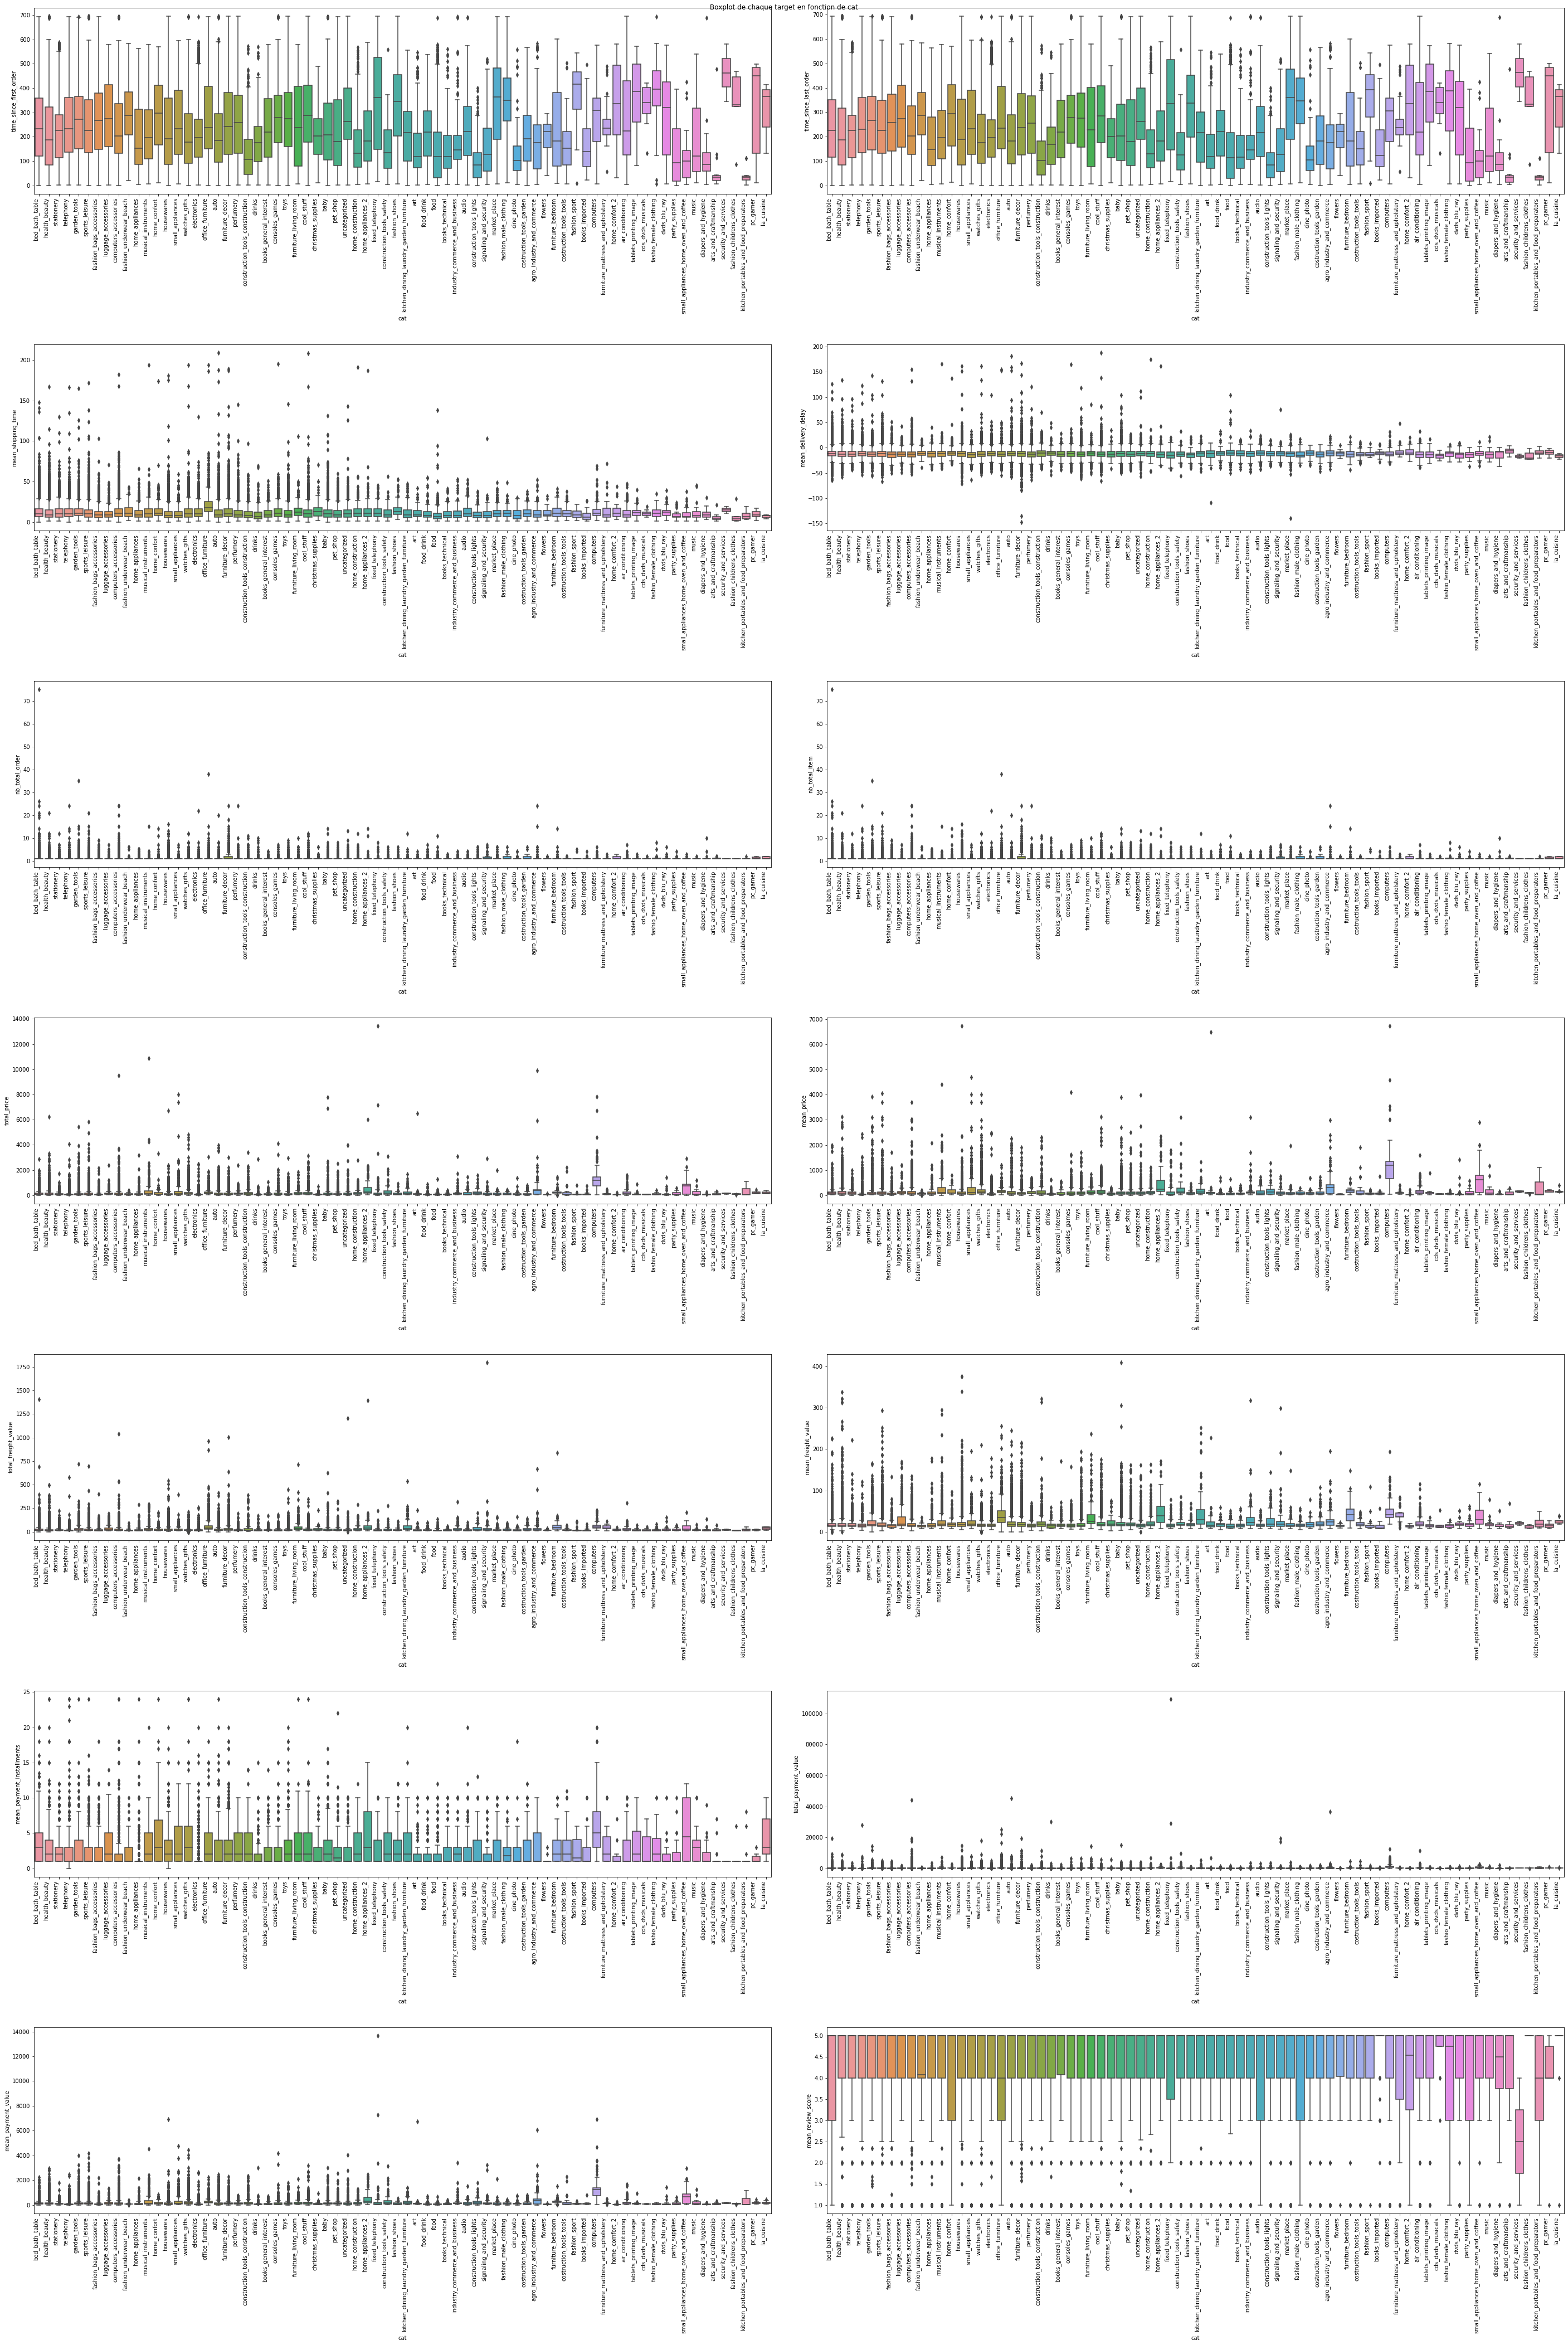

In [128]:
fc.boxplot_relation(data_cust, col_quanti, 'cat', 7, 2, option=True)

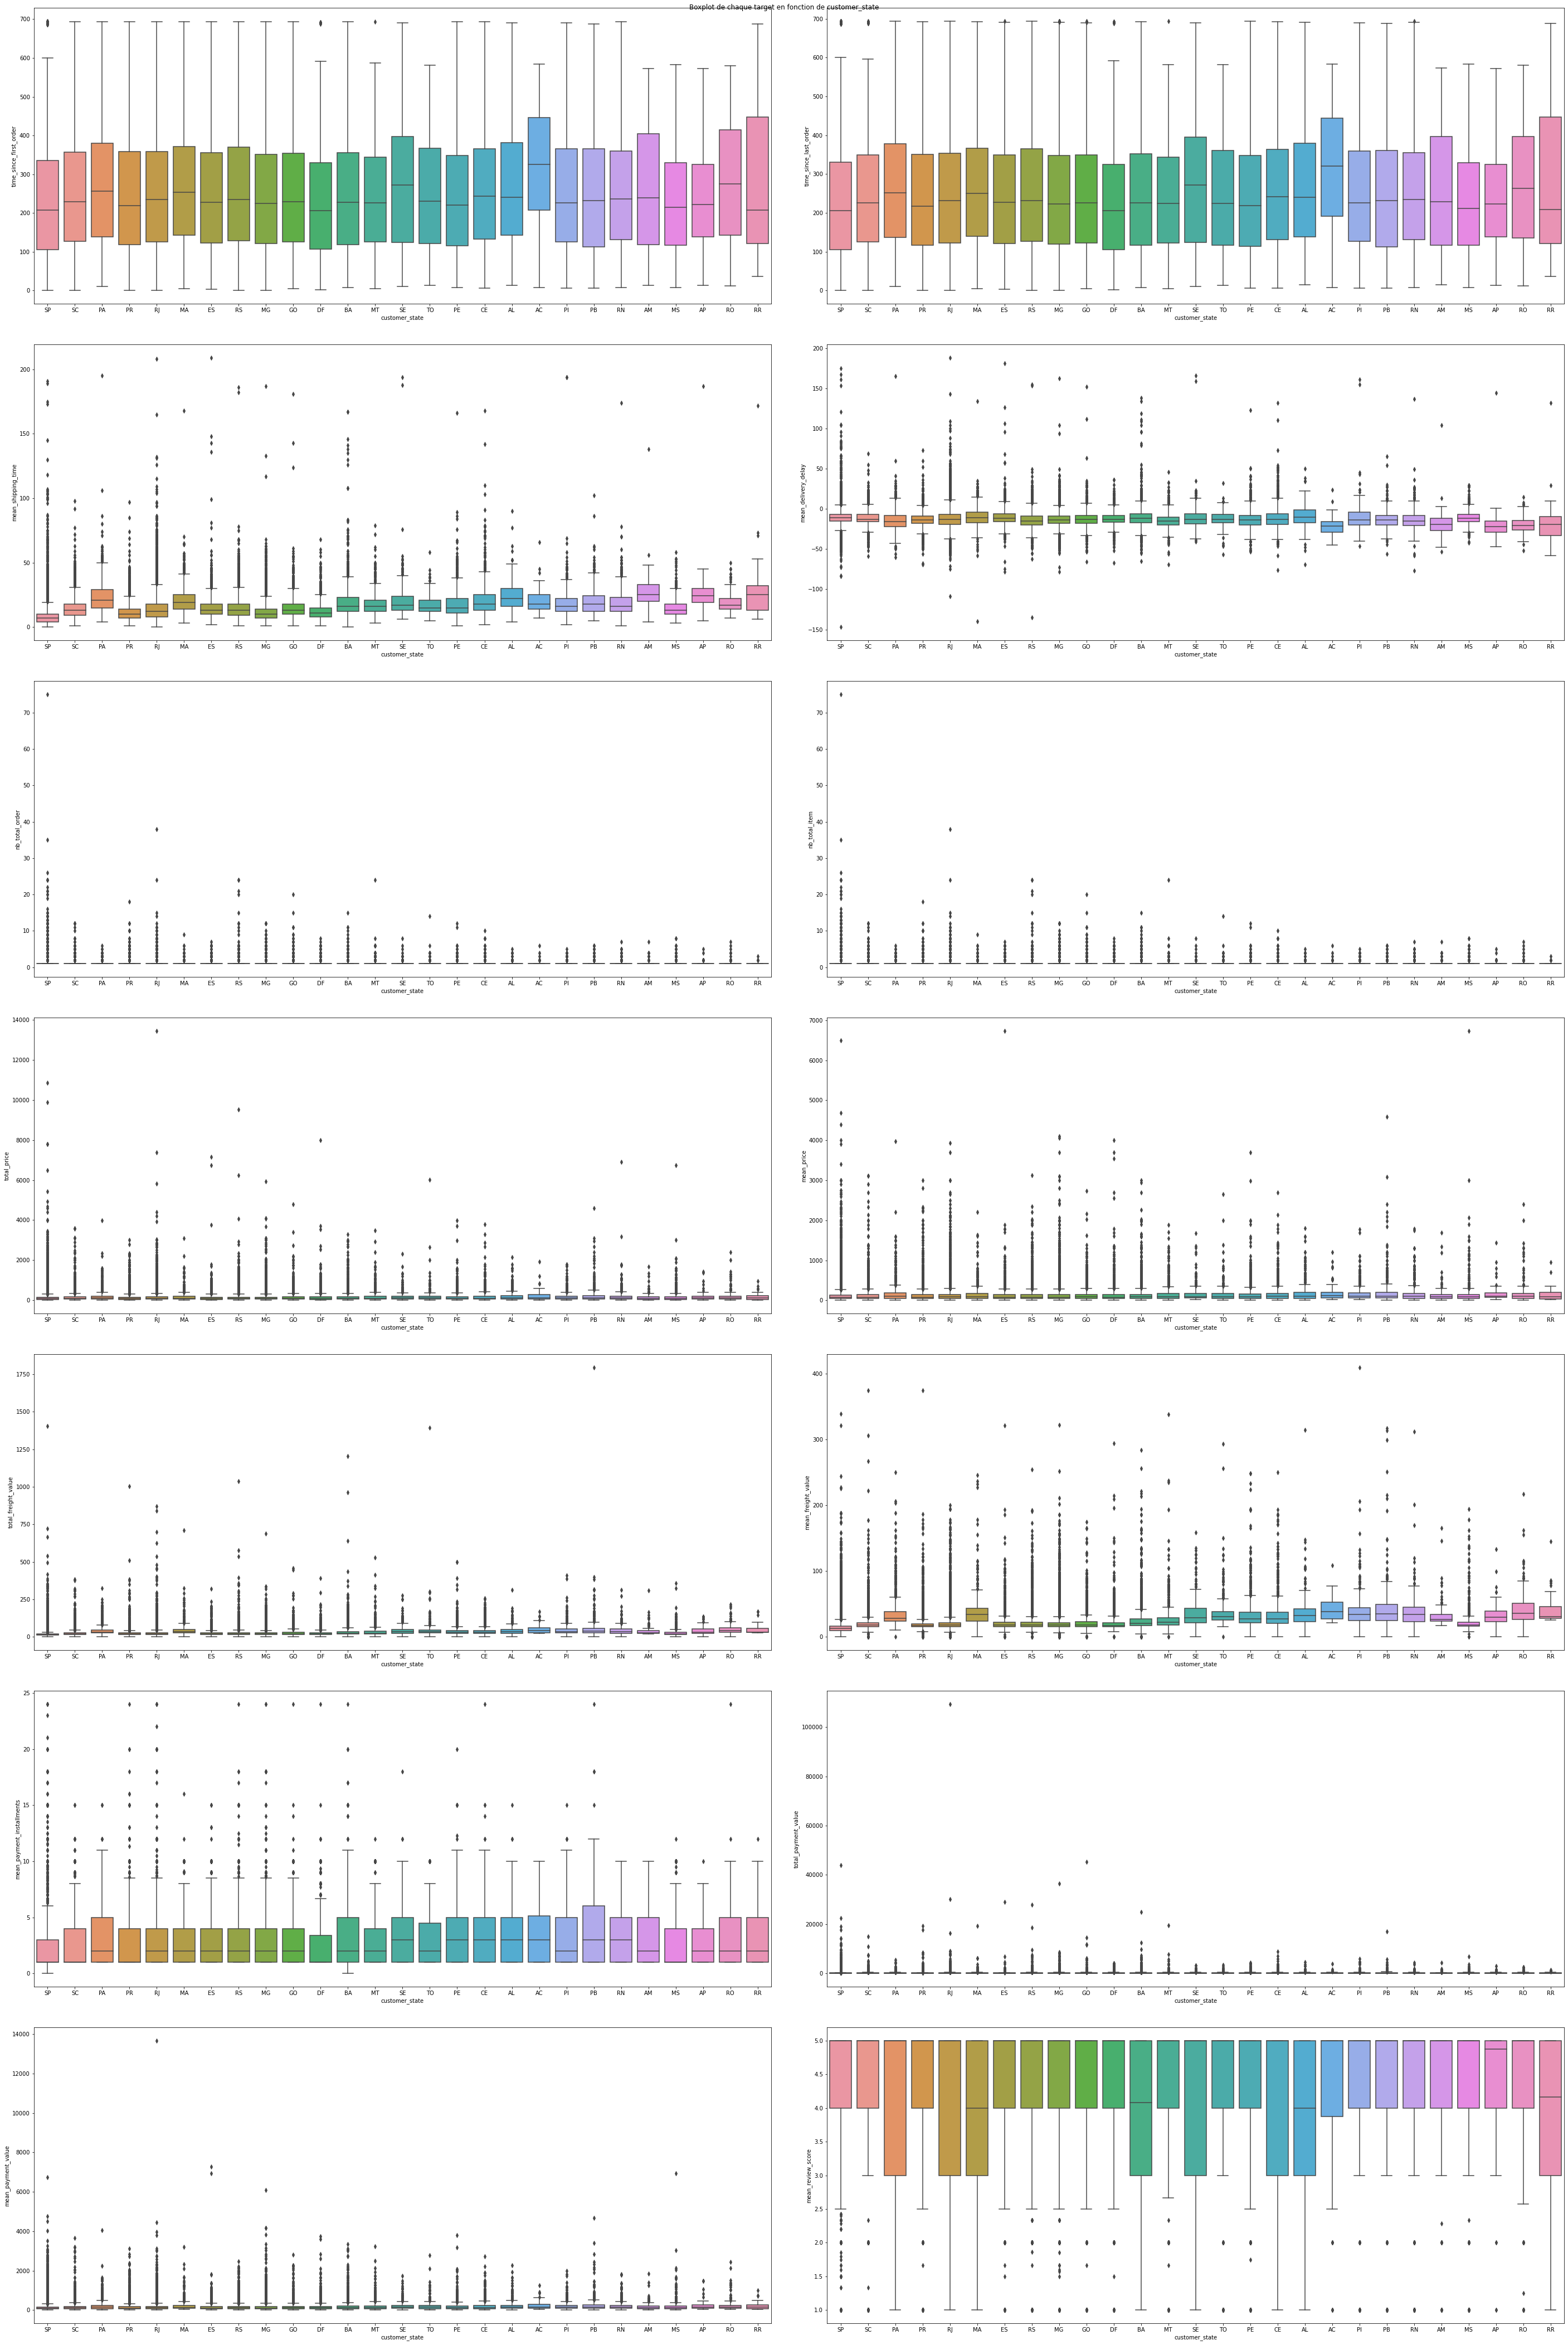

In [129]:
fc.boxplot_relation(data_cust, col_quanti, 'customer_state', 7, 2)

Les graphiques précédents ne nous permettent pas d'identifier une tendance claire.

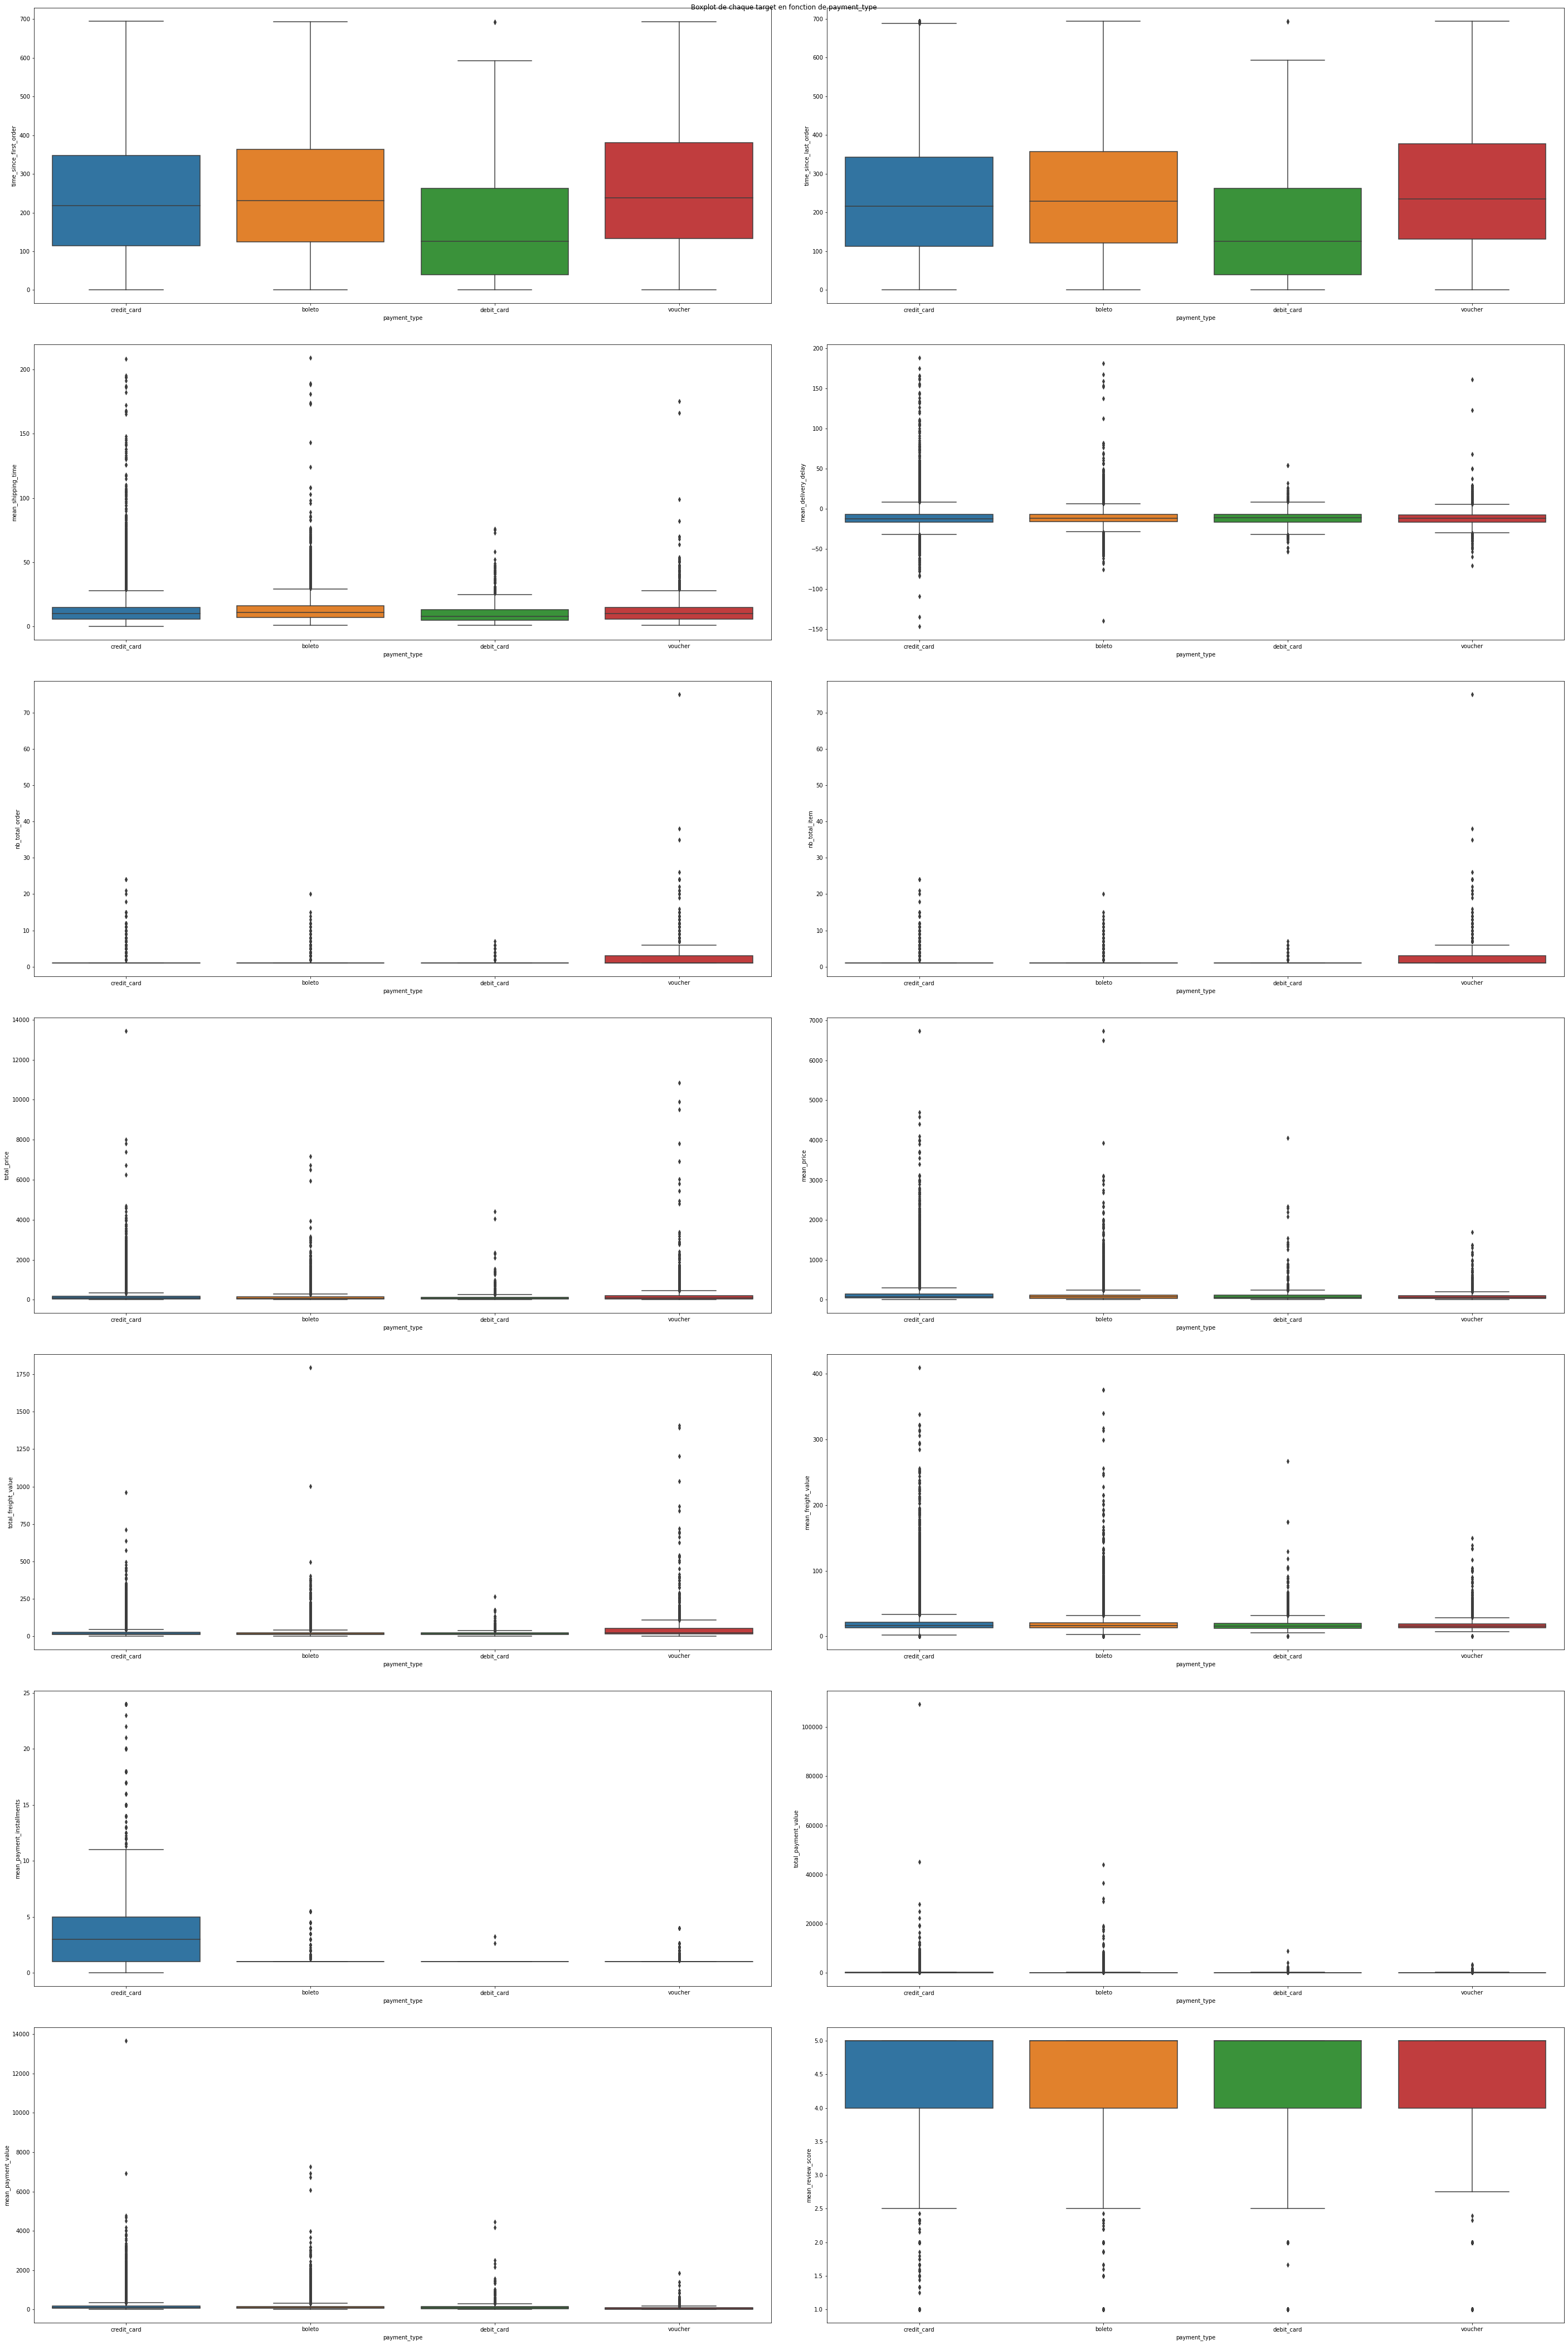

In [124]:
fc.boxplot_relation(data_cust, col_quanti, 'payment_type', 7, 2)

Les différents boxplot ne permettent pas de déterminer de réelles tendances se dégageant. En effet, seul la variable *'credit_card'* se démarque dans le graphique *'mean_payment_installments'* ce qui est cohérent puisque les versements en plusieurs fois sont généralement effectués par carte de crédit. 

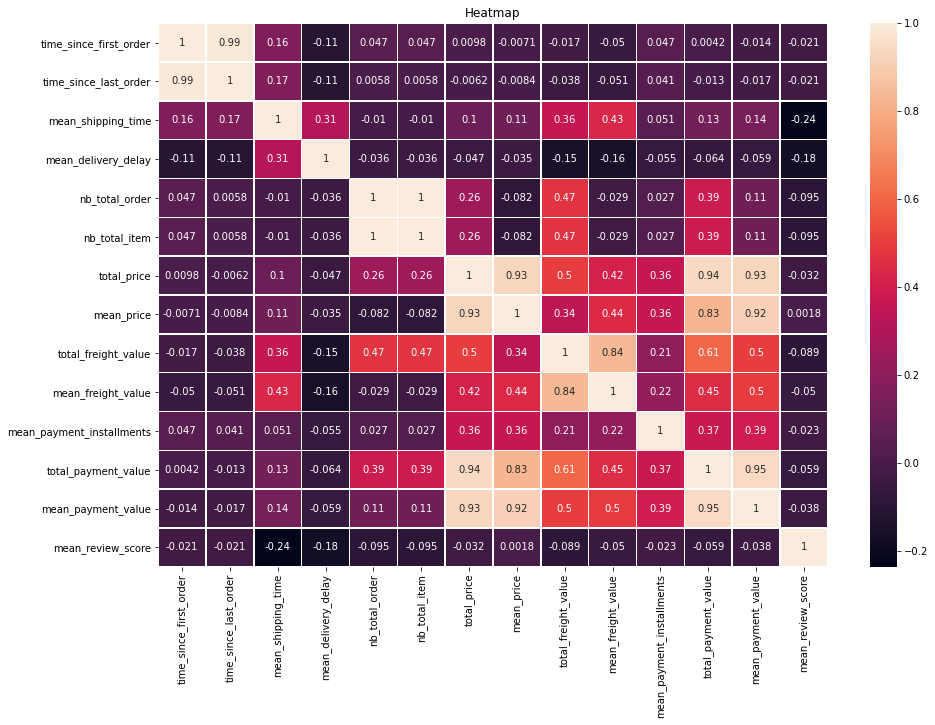

In [133]:
df_corr = data_cust[col_quanti].corr(method='spearman')

fc.heat_map(df_corr)

On constate que certaines variables sont très corrélées:
- *time_since_first_order* et *time_since_last_order* (0.99)
- *nb_total_item* et *nb_total_order* (1)
- *mean_price* et *total_price* (0.93)
- *mean_freight_value* et *total_freight_value* (0.84)
- *total_payment_value* et *mean_payment_value* (0.95)
- *total_payment_value* avec *total_price* (0.94) et *mean_price* (0.83)
- *mean_payment_value* avec *total_price* (0.93) et *mean_price* (0.92)

La plupart de ces corrélations sont dues au fait que seulement 3% des clients ont commandé plusieurs fois. 